<a href="https://colab.research.google.com/github/juliablaz2003/PFG/blob/main/PFG2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Carga y exploración de datos

Bibliotecas

In [ ]:
pip install plotly

In [ ]:
pip install networkx matplotlib numpy scikit-learn python-louvain

Librerias

In [ ]:
import requests
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from sklearn.metrics import silhouette_score, silhouette_samples

In [ ]:
# URL del archivo CSV en GitHub
url = "https://raw.githubusercontent.com/juliablaz2003/PFG/refs/heads/main/breast-cancer.csv"
nombre = 'breast-cancer.csv'


# Realizar la solicitud GET para obtener el contenido del archivo
response = requests.get(url)

# Verificar si la solicitud fue exitosa (código de estado 200)
if response.status_code == 200:
     # Guardar el contenido del archivo en un archivo local
    with open(nombre, 'wb') as f:
        f.write(response.content)
    print("Archivo descargado exitosamente.")
else:
    print("Error al descargar el archivo.")

Archivo descargado exitosamente.


Cargamos el archivo de cáncer de mama CSV en un DataFrame de pandas que llamamos `df`

In [ ]:
df = pd.read_csv(nombre)

A partir de este punto vamos a hacer una exploración de los datos.

In [ ]:
info = df.info()
info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Dimensiones y tipos de datos:

- El dataset contiene 569 filas y 32 columnas.
- La columna `diagnosis` es de tipo objeto (categórica) y las demás variables son numéricas (float64 o int64).

Variables:

- **diagnosis**: Diagnóstico del tumor (Benigno = 0, Maligno = 1).
- **radius_mean**: Radio promedio del núcleo celular (medido en mm).
- **texture_mean**: Variación en la textura de la célula (sin unidad específica).
- **perimeter_mean**: Perímetro promedio del núcleo celular (medido en mm).
- **area_mean**: Área promedio del núcleo celular (medido en mm²).
- **smoothness_mean**: Suavidad de los bordes (sin unidad específica).
- **compactness_mean**: Compacidad de la célula (relación perímetro/área).
- **concavity_mean**: Grado de concavidad de los contornos (sin unidad específica).
- **concave points_mean**: Número de puntos cóncavos en el contorno (sin unidad específica).
- **symmetry_mean**: Simetría del núcleo celular (sin unidad específica).
- **fractal_dimension_mean**: Dimensión fractal del contorno (sin unidad específica).
- **radius_se**: Error estándar del radio (medido en mm).
- **texture_se**: Error estándar de la textura (sin unidad específica).
- **perimeter_se**: Error estándar del perímetro (medido en mm).
- **area_se**: Error estándar del área (medido en mm²).
- **smoothness_se**: Error estándar de la suavidad (sin unidad específica).
- **compactness_se**: Error estándar de la compacidad (sin unidad específica).
- **concavity_se**: Error estándar de la concavidad (sin unidad específica).
- **concave points_se**: Error estándar del número de puntos cóncavos (sin unidad específica).
- **symmetry_se**: Error estándar de la simetría (sin unidad específica).
- **fractal_dimension_se**: Error estándar de la dimensión fractal (sin unidad específica).
- **radius_worst**: Radio del peor caso observado (medido en mm).
- **texture_worst**: Textura del peor caso observado (sin unidad específica).
- **perimeter_worst**: Perímetro del peor caso observado (medido en mm).
- **area_worst**: Área del peor caso observado (medido en mm²).
- **smoothness_worst**: Suavidad del peor caso observado (sin unidad específica).
- **compactness_worst**: Compacidad del peor caso observado (sin unidad específica).
- **concavity_worst**: Concavidad del peor caso observado (sin unidad específica).
- **concave points_worst**: Número de puntos cóncavos en el peor caso observado (sin unidad específica).
- **symmetry_worst**: Simetría del peor caso observado (sin unidad específica).
- **fractal_dimension_worst**: Dimensión fractal del peor caso observado (sin unidad específica).


Se calculan diez características de valor real para cada núcleo de célula:

- Radio (media de las distancias desde el centro hasta los puntos del perímetro)
- Textura (desviación estándar de los valores de la escala de grises)
- Perímetro
- Área
- Suavidad (variación local en las longitudes de los radios)
- Compacidad (perímetro^2 / área - 1.0)
- concavidad (severidad de las partes cóncavas del contorno)
- Puntos cóncavos (número de partes cóncavas del contorno)
- Simetría
- Dimensión fractal ("aproximación de la línea de costa" - 1)

In [ ]:
desc = df.describe()
desc

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

Resumen de Estadísticas:

- Media del radio del tumor: 14.13 (mínimo 6.98, máximo 28.11).
- Media del área del tumor: 654.89 (mínimo 143.50, máximo 2501.00).
- Densidad del tumor (smoothness_mean) varía entre 0.05 y 0.16.
- Valores extremos: Algunas variables tienen valores significativamente mayores que otras (ejemplo: `area_worst` llega a 4254.00).

In [ ]:
missing_values = df.isnull().sum()
missing_values

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

No hay valores nulos en ninguna de lass columnas.

In [ ]:
head = df.head()
head

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

Muestra de los Datos:

- La columna diagnosis indica si el tumor es maligno ('M') o benigno ('B').
- Las demás columnas contienen medidas estadísticas derivadas de imágenes de tumores.

In [ ]:
unicos = df.nunique()
unicos

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: int64

- La columna id tiene 569 valores únicos, lo que indica que no se repiten y probablemente no sea útil para el análisis.
- La variable diagnosis tiene 2 categorías (B, M).
- Otras variables numéricas tienen una gran cantidad de valores distintos.

In [ ]:
duplicados = df.duplicated().sum()
duplicados

np.int64(0)

No hay filas duplicadas en el dataset

In [ ]:
distribucion = df['diagnosis'].value_counts()
distribucion

diagnosis
B    357
M    212
Name: count, dtype: int64

El dataset está desbalanceado, con más tumores benignos que malignos.

# 2. Preprocesamiento de datos (limpieza de valores nulos, codificación de variables categóricas, normalización)

## 2.1 Eliminación de columnas innecesarias

Eliminamos la columna `id` porque no aporta información relevante para el análisis. Esta columna solo sirve como identificador único de cada paciente y no tiene ninguna relación con la clasificación del tumor.



In [ ]:
df = df.drop(columns=['id'])

## 2.2 Codificación de la variable categórica

Convertimos la variable `diagnosis`, que era categórica (`B` para Benigno y `M` para Maligno), en valores numéricos:

- B → 0 (benigno)
- M → 1 (maligno)

Esto es necesario porque muchos algoritmos de Machine Learning requieren que las variables sean numéricas.

In [ ]:
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])
le.classes_

array(['B', 'M'], dtype=object)

In [ ]:
# Mostrar distribución de la variable objetivo después del preprocesamiento
display(df['diagnosis'].value_counts())

diagnosis
0    357
1    212
Name: count, dtype: int64

In [ ]:
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

## 2.3 Normalización/Estandarización de los datos

Aplicamos **StandardScaler**, que transforma los datos para que tengan media = 0 y desviación estándar = 1.

Esto es importante porque las variables tienen escalas muy diferentes (por ejemplo, *area_mean* es mucho mayor que `smoothness_mean`).

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop(columns=['diagnosis']))  # Normalizamos solo las variables numéricas

Luego, convertimos los datos normalizados en un nuevo DataFrame, manteniendo los nombres originales de las columnas.

Mantenemos la estructura del dataset con la columna `diagnosis` agregada de nuevo.

In [ ]:
# Convertimos el resultado en un DataFrame con los mismos nombres de columnas
column_names = df.drop(columns=['diagnosis']).columns
df_scaled = pd.DataFrame(df_scaled, columns=column_names)
#df_scaled['diagnosis'] = df['diagnosis']  # Añadimos de nuevo la columna objetivo

## 2.4 Verificación de los datos después del preprocesamiento

Mostramos las primeras filas del dataset ya normalizado.

In [ ]:
# Mostrar primeras filas después del preprocesamiento
display(df_scaled.head())

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                2.255747  ...      1.886690      -1.359293         2.303601   
1               -0.868652  ...      1.805927      -0.369203         1.535126   
2               -0.398008  ...      1.511870      -0.023974         1.347475   
3                4.910919  ...     -0.281464       0.133984        -0.249939   
4               -0.562450  ...      1.298575      -1.466770         1.338539   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0    2.001237          1.307686           2.616665         2.109526   
1    1.890489         -0.375612          -0.430444        -0.146749   
2    1.456285          0.527407           1.082932         0.854974   
3   -0.550021          3.394275           3.893397         1.989588   
4    1.220724          0.220556          -0.313395         0.613179   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0              2.296076        2.750622                 1.937015  
1              1.087084       -0.243890                 0.281190  
2              1.955000        1.152255                 0.201391  
3              2.175786        6.046041                 4.935010  
4              0.729259       -0.868353                -0.397100  

[5 rows x 30 columns]

Revisamos que todas las variables ahora tengan:

- Media ≈ 0
- Desviación estándar ≈ 1

In [ ]:
# Mostrar estadísticas después de la normalización
display(df_scaled.describe())

radius_mean  texture_mean  perimeter_mean     area_mean  \
count  5.690000e+02  5.690000e+02    5.690000e+02  5.690000e+02   
mean  -1.373633e-16  6.868164e-17   -1.248757e-16 -2.185325e-16   
std    1.000880e+00  1.000880e+00    1.000880e+00  1.000880e+00   
min   -2.029648e+00 -2.229249e+00   -1.984504e+00 -1.454443e+00   
25%   -6.893853e-01 -7.259631e-01   -6.919555e-01 -6.671955e-01   
50%   -2.150816e-01 -1.046362e-01   -2.359800e-01 -2.951869e-01   
75%    4.693926e-01  5.841756e-01    4.996769e-01  3.635073e-01   
max    3.971288e+00  4.651889e+00    3.976130e+00  5.250529e+00   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count     5.690000e+02      5.690000e+02    5.690000e+02         5.690000e+02   
mean     -8.366672e-16      1.873136e-16    4.995028e-17        -4.995028e-17   
std       1.000880e+00      1.000880e+00    1.000880e+00         1.000880e+00   
min      -3.112085e+00     -1.610136e+00   -1.114873e+00        -1.261820e+00   
25%      -7.109628e-01     -7.470860e-01   -7.437479e-01        -7.379438e-01   
50%      -3.489108e-02     -2.219405e-01   -3.422399e-01        -3.977212e-01   
75%       6.361990e-01      4.938569e-01    5.260619e-01         6.469351e-01   
max       4.770911e+00      4.568425e+00    4.243589e+00         3.927930e+00   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count   5.690000e+02            5.690000e+02  ...  5.690000e+02   
mean    1.748260e-16            4.745277e-16  ... -8.241796e-16   
std     1.000880e+00            1.000880e+00  ...  1.000880e+00   
min    -2.744117e+00           -1.819865e+00  ... -1.726901e+00   
25%    -7.032397e-01           -7.226392e-01  ... -6.749213e-01   
50%    -7.162650e-02           -1.782793e-01  ... -2.690395e-01   
75%     5.307792e-01            4.709834e-01  ...  5.220158e-01   
max     4.484751e+00            4.910919e+00  ...  4.094189e+00   

       texture_worst  perimeter_worst  area_worst  smoothness_worst  \
count   5.690000e+02     5.690000e+02  569.000000      5.690000e+02   
mean    1.248757e-17    -3.746271e-16    0.000000     -2.372638e-16   
std     1.000880e+00     1.000880e+00    1.000880      1.000880e+00   
min    -2.223994e+00    -1.693361e+00   -1.222423     -2.682695e+00   
25%    -7.486293e-01    -6.895783e-01   -0.642136     -6.912304e-01   
50%    -4.351564e-02    -2.859802e-01   -0.341181     -4.684277e-02   
75%     6.583411e-01     5.402790e-01    0.357589      5.975448e-01   
max     3.885905e+00     4.287337e+00    5.930172      3.955374e+00   

       compactness_worst  concavity_worst  concave points_worst  \
count       5.690000e+02     5.690000e+02          5.690000e+02   
mean       -3.371644e-16     7.492542e-17          2.247763e-16   
std         1.000880e+00     1.000880e+00          1.000880e+00   
min        -1.443878e+00    -1.305831e+00         -1.745063e+00   
25%        -6.810833e-01    -7.565142e-01         -7.563999e-01   
50%        -2.695009e-01    -2.182321e-01         -2.234689e-01   
75%         5.396688e-01     5.311411e-01          7.125100e-01   
max         5.112877e+00     4.700669e+00          2.685877e+00   

       symmetry_worst  fractal_dimension_worst  
count    5.690000e+02             5.690000e+02  
mean     2.622390e-16            -5.744282e-16  
std      1.000880e+00             1.000880e+00  
min     -2.160960e+00            -1.601839e+00  
25%     -6.418637e-01            -6.919118e-01  
50%     -1.274095e-01            -2.164441e-01  
75%      4.501382e-01             4.507624e-01  
max      6.046041e+00             6.846856e+00  

[8 rows x 30 columns]

Esto confirma que la normalización se aplicó correctamente.

# 3. Análisis exploratorio con gráficos y correlaciones

## 3.1 Distribución de la Variable Objetivo

<ipython-input-21-a65a000473c2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['diagnosis'], palette='coolwarm')


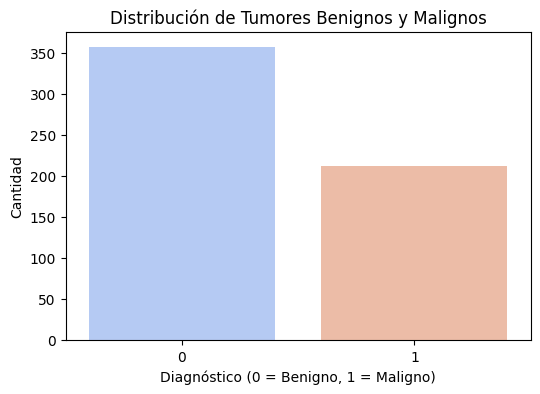

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['diagnosis'], palette='coolwarm')
plt.title('Distribución de Tumores Benignos y Malignos')
plt.xlabel('Diagnóstico (0 = Benigno, 1 = Maligno)')
plt.ylabel('Cantidad')
plt.show()

## 3.2 Mapa de Calor de Correlación

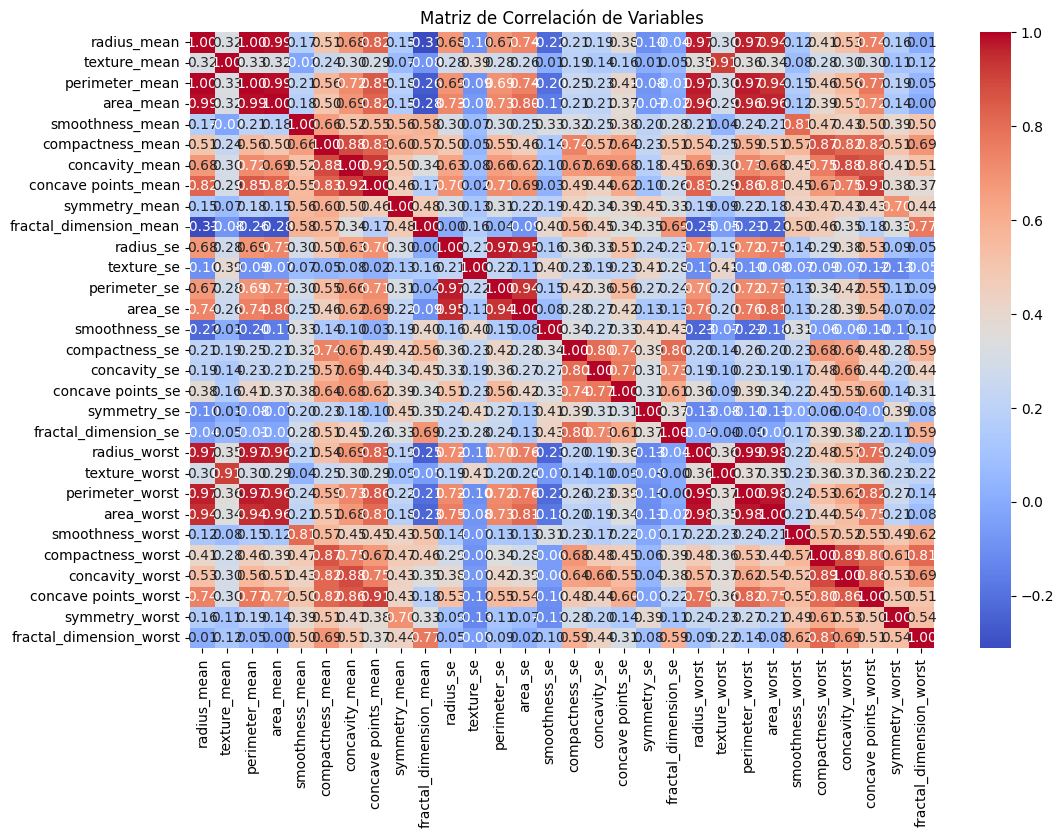

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df_scaled.corr(), cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Matriz de Correlación de Variables')
plt.show()

El mapa de calor nos proporciona infornmación clave sobre la relación entre las variables en el conjunto de datos.

In [ ]:
df_scaled.corr()

radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean                 1.000000      0.323782        0.997855   0.987357   
texture_mean                0.323782      1.000000        0.329533   0.321086   
perimeter_mean              0.997855      0.329533        1.000000   0.986507   
area_mean                   0.987357      0.321086        0.986507   1.000000   
smoothness_mean             0.170581     -0.023389        0.207278   0.177028   
compactness_mean            0.506124      0.236702        0.556936   0.498502   
concavity_mean              0.676764      0.302418        0.716136   0.685983   
concave points_mean         0.822529      0.293464        0.850977   0.823269   
symmetry_mean               0.147741      0.071401        0.183027   0.151293   
fractal_dimension_mean     -0.311631     -0.076437       -0.261477  -0.283110   
radius_se                   0.679090      0.275869        0.691765   0.732562   
texture_se                 -0.097317      0.386358       -0.086761  -0.066280   
perimeter_se                0.674172      0.281673        0.693135   0.726628   
area_se                     0.735864      0.259845        0.744983   0.800086   
smoothness_se              -0.222600      0.006614       -0.202694  -0.166777   
compactness_se              0.206000      0.191975        0.250744   0.212583   
concavity_se                0.194204      0.143293        0.228082   0.207660   
concave points_se           0.376169      0.163851        0.407217   0.372320   
symmetry_se                -0.104321      0.009127       -0.081629  -0.072497   
fractal_dimension_se       -0.042641      0.054458       -0.005523  -0.019887   
radius_worst                0.969539      0.352573        0.969476   0.962746   
texture_worst               0.297008      0.912045        0.303038   0.287489   
perimeter_worst             0.965137      0.358040        0.970387   0.959120   
area_worst                  0.941082      0.343546        0.941550   0.959213   
smoothness_worst            0.119616      0.077503        0.150549   0.123523   
compactness_worst           0.413463      0.277830        0.455774   0.390410   
concavity_worst             0.526911      0.301025        0.563879   0.512606   
concave points_worst        0.744214      0.295316        0.771241   0.722017   
symmetry_worst              0.163953      0.105008        0.189115   0.143570   
fractal_dimension_worst     0.007066      0.119205        0.051019   0.003738   

                         smoothness_mean  compactness_mean  concavity_mean  \
radius_mean                     0.170581          0.506124        0.676764   
texture_mean                   -0.023389          0.236702        0.302418   
perimeter_mean                  0.207278          0.556936        0.716136   
area_mean                       0.177028          0.498502        0.685983   
smoothness_mean                 1.000000          0.659123        0.521984   
compactness_mean                0.659123          1.000000        0.883121   
concavity_mean                  0.521984          0.883121        1.000000   
concave points_mean             0.553695          0.831135        0.921391   
symmetry_mean                   0.557775          0.602641        0.500667   
fractal_dimension_mean          0.584792          0.565369        0.336783   
radius_se                       0.301467          0.497473        0.631925   
texture_se                      0.068406          0.046205        0.076218   
perimeter_se                    0.296092          0.548905        0.660391   
area_se                         0.246552          0.455653        0.617427   
smoothness_se                   0.332375          0.135299        0.098564   
compactness_se                  0.318943          0.738722        0.670279   
concavity_se                    0.248396          0.570517        0.691270   
concave points_se               0.380676          0.642262        0.683260   
symmetry_se                    

En el mapa de calor de correlación, se observa que algunas variables están altamente correlacionadas entre sí, lo que indica que miden aspectos similares del tumor. Por ejemplo, `radius_mean`, `perimeter_mean` y `area_mean` tienen una correlación cercana a 1, lo que sugiere que todas representan el tamaño del tumor. De manera similar, `compactness_mean`, `concavity_mean` y `concave points_mean` están fuertemente relacionadas, reflejando características de la forma del tumor.

Esta redundancia puede ser útil para el modelo, pero también sugiere que algunas variables podrían eliminarse o combinarse para reducir la dimensionalidad sin perder información clave. En este caso, vamos a seleccionar únicamente una variable representativa de cada grupo de alta correlación, asegurando que conservamos la información más relevante mientras reducimos la complejidad del modelo.

In [ ]:
# Calcular la matriz de correlación
corr_matrix = df_scaled.corr().abs()

# Seleccionar variables con alta correlación (umbral de 0.9)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Identificar columnas altamente correlacionadas para eliminar
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

# Mostrar las variables que se eliminarán
print(f"Variables eliminadas por alta correlación: {to_drop}")

# Crear un nuevo DataFrame sin las variables redundantes
df_reduced = df_scaled.drop(columns=to_drop)

# Verificar la nueva forma del dataset reducido
print(f"Dimensiones originales: {df_scaled.shape}")
print(f"Dimensiones después de la reducción: {df_reduced.shape}")

Variables eliminadas por alta correlación: ['perimeter_mean', 'area_mean', 'concave points_mean', 'perimeter_se', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'concave points_worst']
Dimensiones originales: (569, 30)
Dimensiones después de la reducción: (569, 20)


Las siguientes variables fueron eliminadas debido a su alta correlación con otras dentro del conjunto de datos:

- perimeter_mean, area_mean → Altamente correlacionadas con radius_mean.
- concave points_mean → Altamente correlacionada con concavity_mean.
- perimeter_se, area_se → Redundantes con radius_se.
- radius_worst, texture_worst, perimeter_worst, area_worst → Representan métricas similares a sus versiones "mean" o "se".
- concave points_worst → Altamente correlacionada con concavity_worst.


Al eliminar estas variables, pasamos de 31 a 21 variables, lo que reduce la dimensionalidad del conjunto de datos sin perder información relevante. Esto mejorará la eficiencia del modelo y reducirá el ruido en los análisis posteriores.

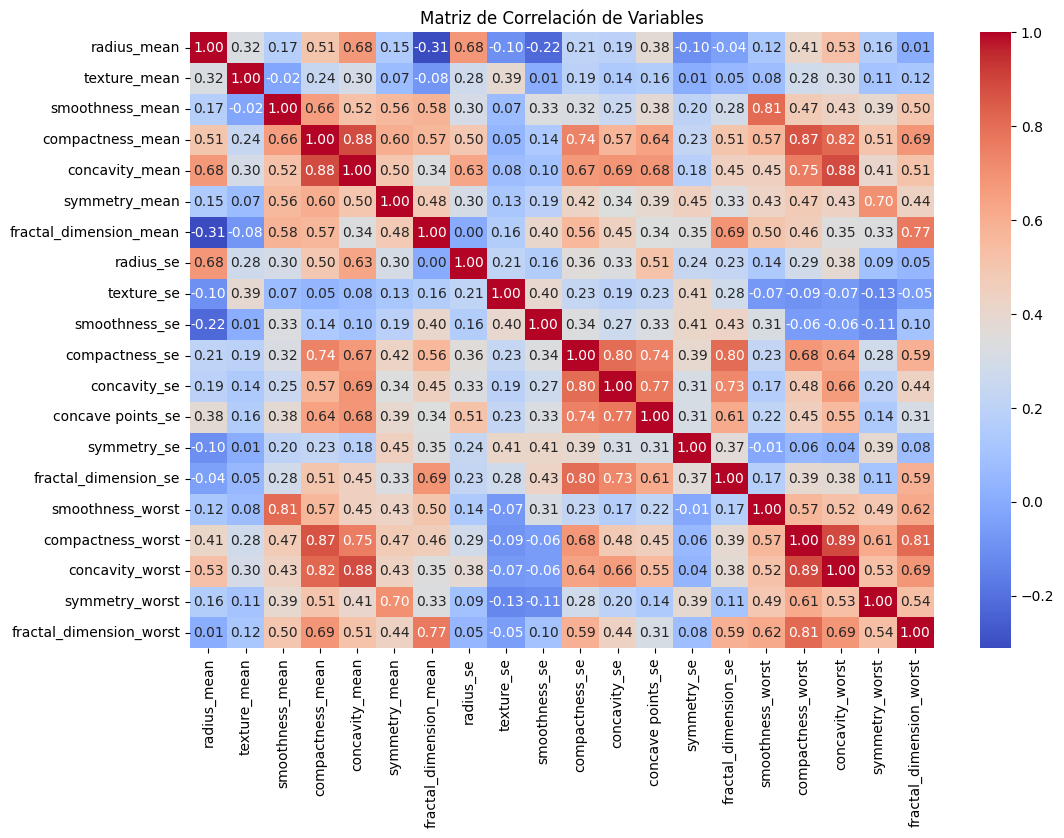

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df_reduced.corr(), cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Matriz de Correlación de Variables')
plt.show()

## 3.3 Histogramas de las Variables

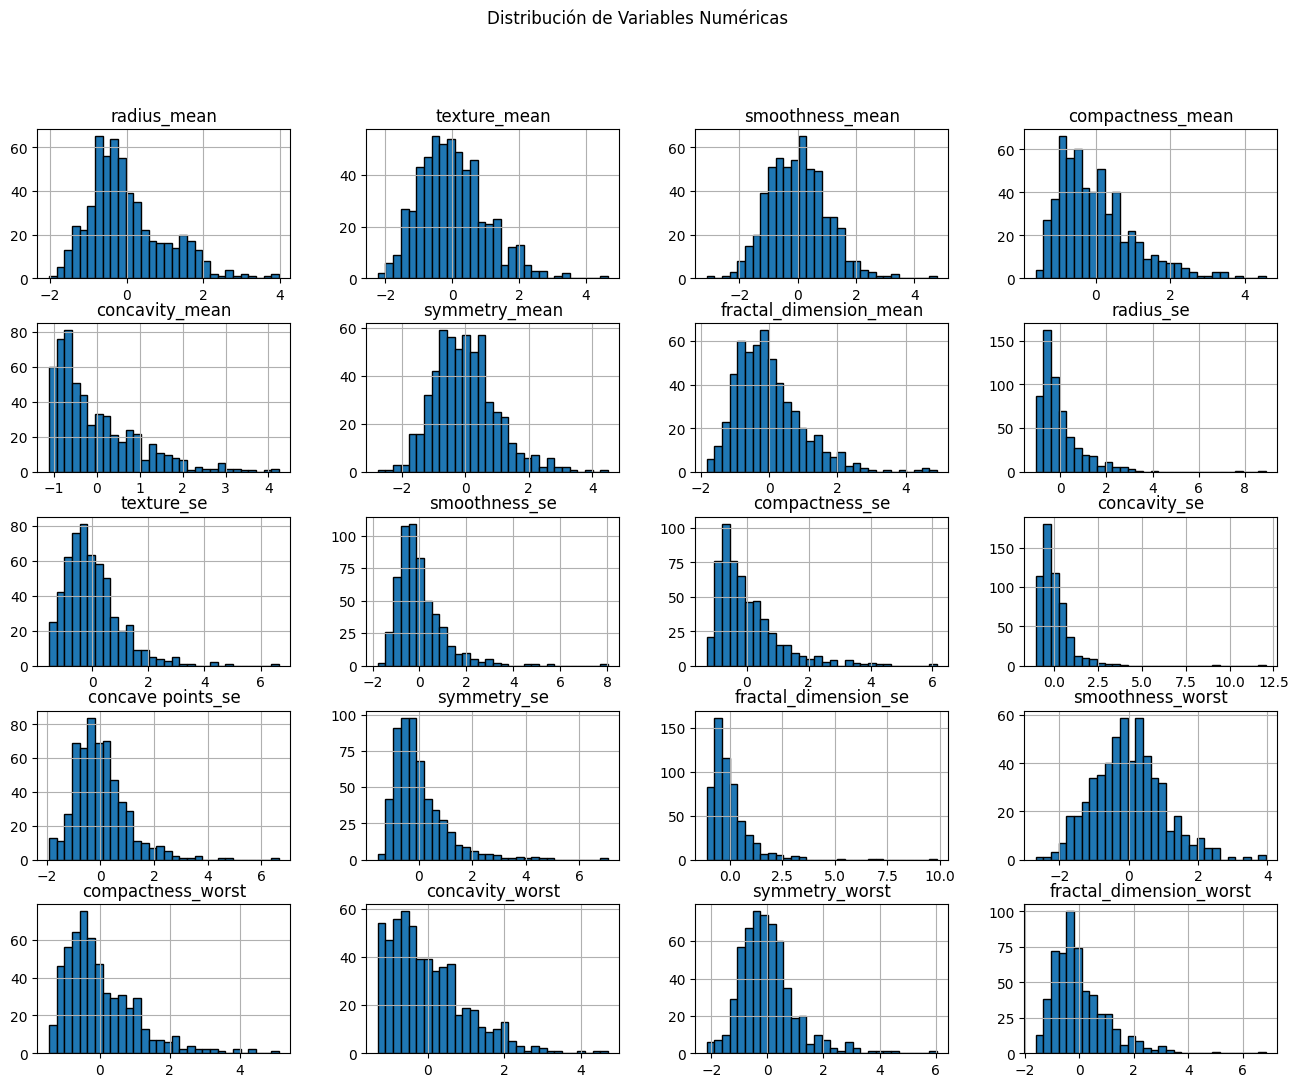

In [ ]:
df_reduced.hist(figsize=(16,12), bins=30, edgecolor='black')
plt.suptitle('Distribución de Variables Numéricas')
plt.show()

## 3.4 Boxplots para Identificación de Valores Atípicos

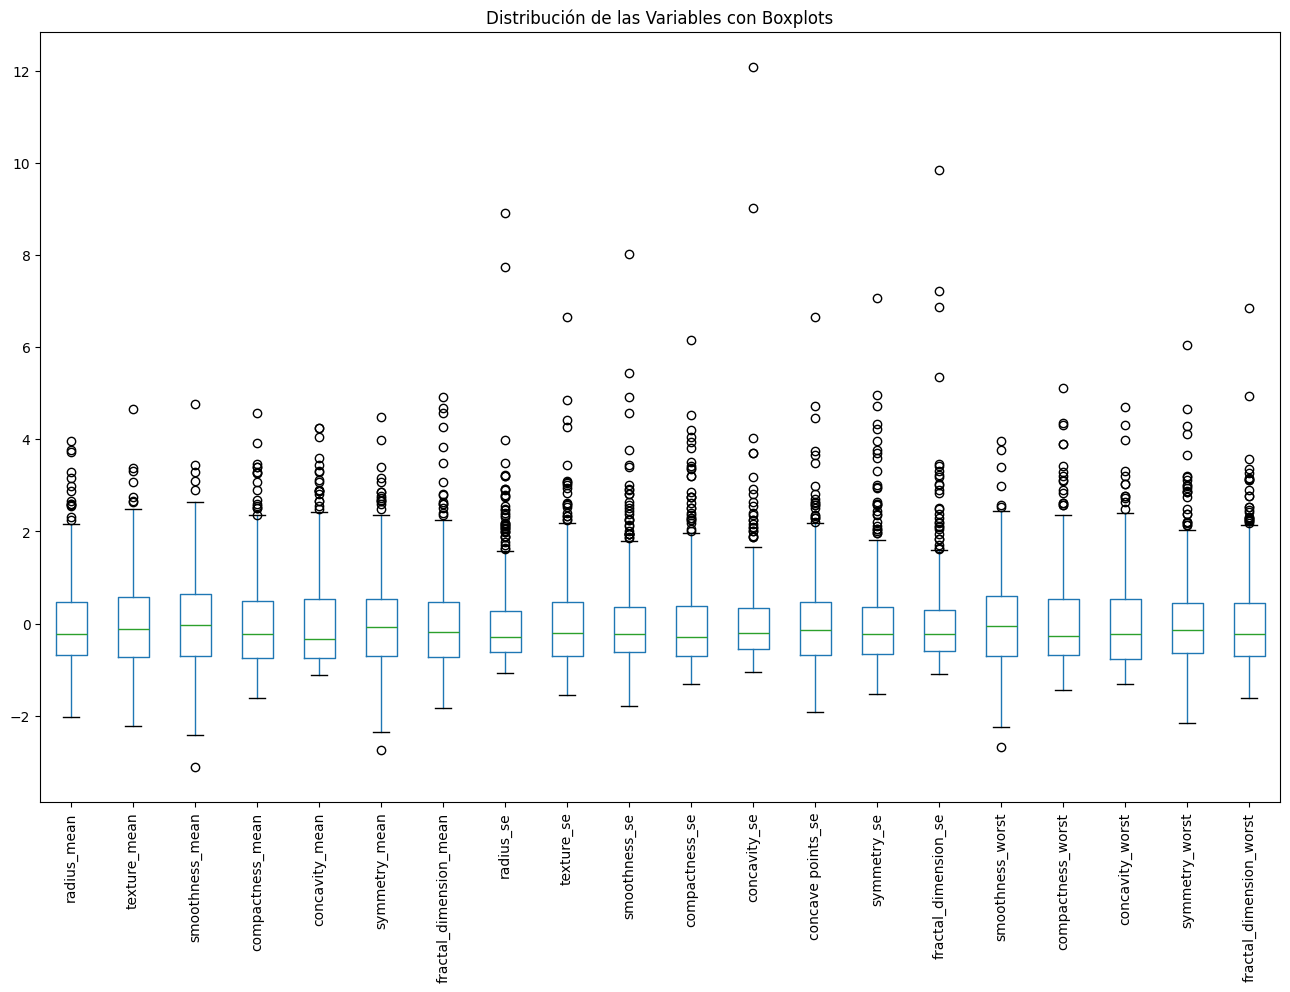

In [ ]:
plt.figure(figsize=(16,10))
df_reduced.boxplot(rot=90, grid=False)
plt.title('Distribución de las Variables con Boxplots')
plt.show()

Como vemos que hay muchos outliers, usamos el método Z-score para eliminarlos.

In [ ]:
# Función para eliminar outliers usando IQR
def eliminar_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df_sin_outliers = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df_sin_outliers

# Aplicar la eliminación de outliers
df_reduced_sin_outliers = eliminar_outliers_iqr(df_reduced)

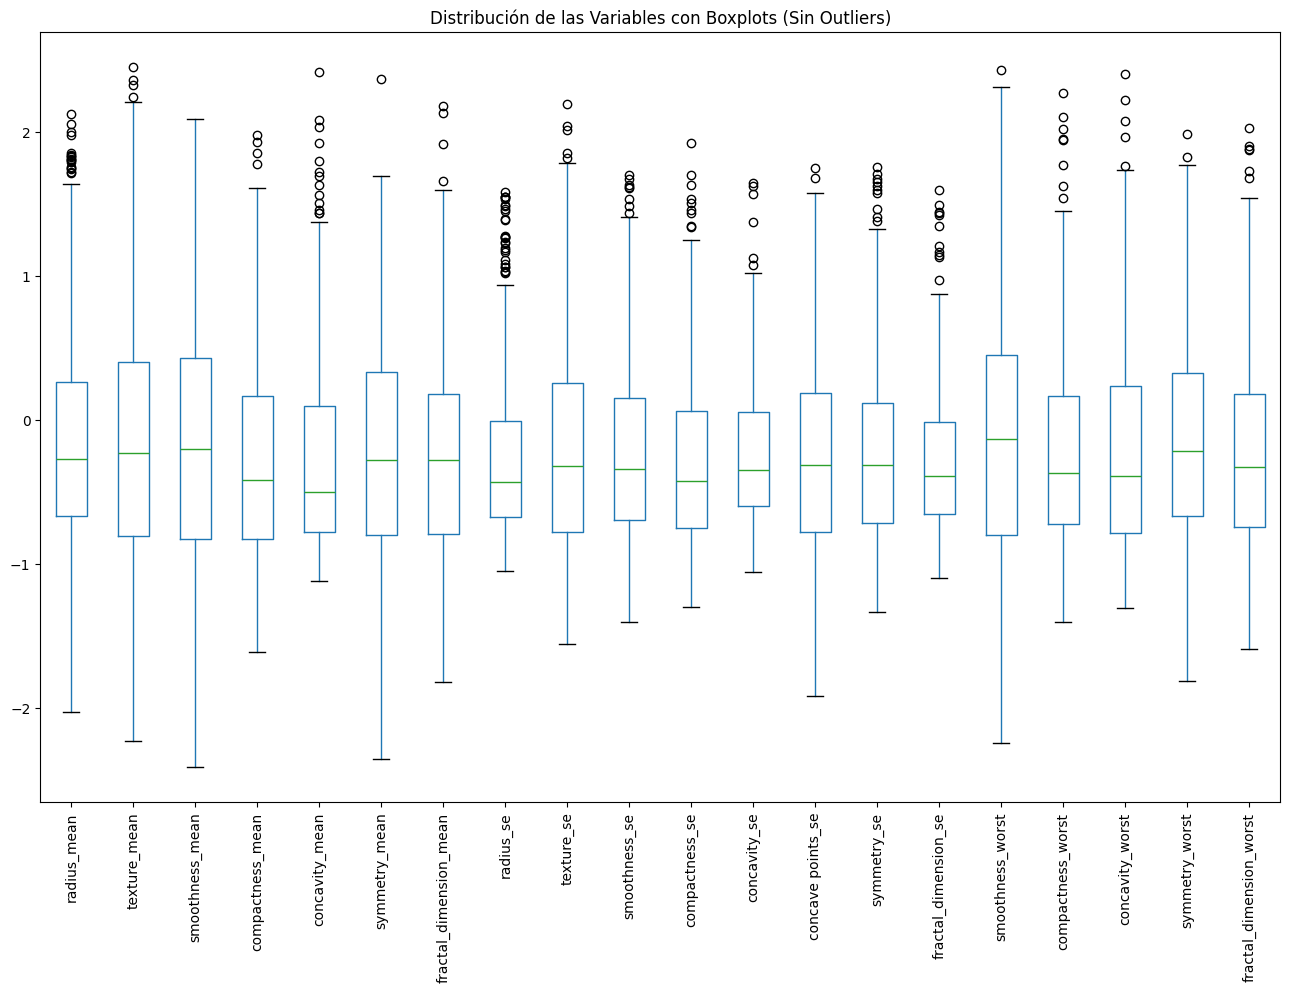

In [ ]:
# Mostrar boxplots después de eliminar outliers
plt.figure(figsize=(16, 10))
df_reduced_sin_outliers.boxplot(rot=90, grid=False)
plt.title('Distribución de las Variables con Boxplots (Sin Outliers)')
plt.show()

In [ ]:
# Verificar media y desviación estándar después de normalizar
media = df_reduced.mean()
std_dev = df_reduced.std()

print("Media de las variables después de la normalización:\n", media)
print("\nDesviación estándar después de la normalización:\n", std_dev)

Media de las variables después de la normalización:
 radius_mean               -1.373633e-16
texture_mean               6.868164e-17
smoothness_mean           -8.366672e-16
compactness_mean           1.873136e-16
concavity_mean             4.995028e-17
symmetry_mean              1.748260e-16
fractal_dimension_mean     4.745277e-16
radius_se                  2.372638e-16
texture_se                -1.123881e-16
smoothness_se             -1.529727e-16
compactness_se             1.748260e-16
concavity_se               1.623384e-16
concave points_se          0.000000e+00
symmetry_se                8.741299e-17
fractal_dimension_se      -6.243785e-18
smoothness_worst          -2.372638e-16
compactness_worst         -3.371644e-16
concavity_worst            7.492542e-17
symmetry_worst             2.622390e-16
fractal_dimension_worst   -5.744282e-16
dtype: float64

Desviación estándar después de la normalización:
 radius_mean                1.00088
texture_mean               1.00088
smoothness_

In [ ]:
# Mostrar el nuevo tamaño del dataset después de eliminar outliers
df_reduced_sin_outliers.shape

(426, 20)

# 4. Aplicación de PCA para reducción de dimensionalidad

El Análisis de Componentes Principales (PCA) es una técnica de reducción de dimensionalidad que transforma un conjunto de variables originales en un nuevo conjunto de variables llamadas componentes principales.

Sirve para reducir el número de variables sin perder demasiada información.
Eliminar redundancias en datos con muchas variables correlacionadas.
Visualizar datos en menos dimensiones (2D o 3D).

## 4.1 Preparación de los Datos

Primero, cargamos y preparamos el conjunto de datos de cáncer de mama (df_reduced_sin_outliers), el cual ha sido limpiado de valores atípicos (outliers) y normalizado. Esta es la base para aplicar PCA (Análisis de Componentes Principales).

In [ ]:
X = df_reduced_sin_outliers

## 4.2 Aplicación de PCA sin Especificar Componentes

En este paso, aplicamos PCA sin especificar el número de componentes. Esto nos permite obtener la varianza explicada por cada componente principal.

El objetivo es calcular cómo cada componente principal captura la varianza en los datos. PCA transforma el conjunto de datos en un espacio de componentes donde cada componente es una combinación lineal de las variables originales.

In [ ]:
pca = PCA()
pca.fit(X)

PCA()

## 4.3 Graficar la Varianza Explicada Acumulada

A continuación, graficamos la varianza explicada acumulada para ver cuánta varianza total es explicada a medida que agregamos más componentes. Esta visualización muestra la cantidad de información que cada componente está capturando.

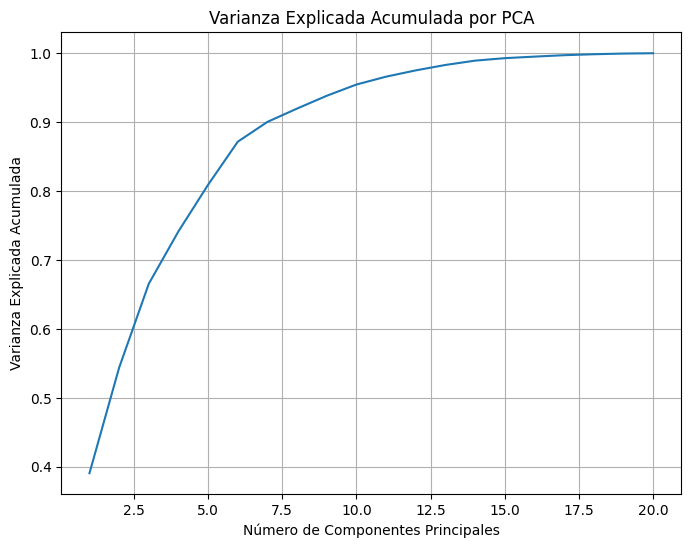

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(range(1, len(X.columns) + 1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada Acumulada por PCA')
plt.grid(True)
plt.show()

In [ ]:
varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)
print("Varianza explicada acumulada por los primeros componentes:")
print(varianza_acumulada)

Varianza explicada acumulada por los primeros componentes:
[0.39080766 0.54385169 0.66560654 0.74162393 0.80925277 0.8716942
 0.90042947 0.91975558 0.93828844 0.95460217 0.96600785 0.97513035
 0.9829748  0.98924337 0.99284103 0.99506764 0.99713331 0.99851227
 0.99951325 1.        ]


PC1 es el componente que explica la mayor parte de la varianza en los datos.

La varianza acumulada muestra cómo se captura la información en los componentes siguientes. En nuestro caso, con los primeros 7 componentes ya se explica más del 90% de la varianza.

## 4.4 Determinación del Número de Componentes Necesarios

A partir del gráfico y de la varianza explicada acumulada, determinamos cuántos componentes necesitamos para explicar al menos el 90% de la varianza. En nuestro caso, la gráfica nos muestra que 7 componentes son suficientes.


In [ ]:
numero_componentes = np.argmax(varianza_acumulada >= 0.90) + 1
print(f"Se necesitan {numero_componentes} componentes para explicar al menos el 90% de la varianza.")

Se necesitan 7 componentes para explicar al menos el 90% de la varianza.


Aunque podemos visualizar solo los primeros dos componentes, hemos encontrado que 7 componentes explican más del 90% de la varianza en los datos. Esto significa que, si queremos reducir la dimensionalidad sin perder mucha información, podemos usar esos 7 componentes.

## 4.5 Aplicación de PCA con el Número Óptimo de Componentes

Usamos los 7 componentes seleccionados y aplicamos PCA para reducir los datos a esos componentes.

In [ ]:
pca = PCA(n_components=numero_componentes)
pca_result = pca.fit_transform(X)

Esto nos da una nueva representación de los datos en un espacio de 7 dimensiones, en el cual cada componente principal captura una parte de la varianza de los datos originales.

## 4.6 Crear DataFrame con los Resultados de PCA

In [ ]:
# Create an explicit copy
df_reduced_sin_outliers = df_reduced.copy()

# Apply outlier removal to the copy
df_reduced_sin_outliers = eliminar_outliers_iqr(df_reduced_sin_outliers)

In [ ]:
# Asegurémonos de que la variable objetivo 'diagnosis' esté en df_reduced_sin_outliers
# Recuperar 'diagnosis' de df original y agregarla a df_reduced_sin_outliers
df_reduced_sin_outliers.loc[:, 'diagnosis'] = df['diagnosis'].reset_index(drop=True)

# Crear DataFrame con los resultados de PCA
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(numero_componentes)])

# Concatenar los componentes principales con la variable objetivo 'diagnosis'
pca_df['diagnosis'] = df_reduced_sin_outliers['diagnosis'].reset_index(drop=True)

Incorporar la columna `diagnosis` al DataFrame resultante nos permite etiquetar y visualizar los tumores como benignos o malignos según sus valores en los componentes principales.

In [ ]:
pca_df.head(10)

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.185233  1.630281 -1.011832  0.116248 -0.544507 -0.418378 -0.038664   
1  4.242156  1.334582 -0.245726  0.455465 -1.268746 -0.043524  0.215679   
2  2.308284  1.162547  0.098452 -0.808819 -1.579010 -2.485926  0.818088   
3  1.061037  1.212779 -1.384387  0.682658  0.292600 -0.197298  0.036869   
4  3.921780 -1.970490  0.441664  0.254805  0.550638  0.059854 -0.965516   
5 -1.168081  1.306252 -0.164651  0.444280  1.023033  0.578836 -0.272886   
6  2.820044  0.202394 -0.807155 -0.425226 -0.364050  1.261792  0.401020   
7  0.451135  1.718602  1.935111  0.170035 -1.181032 -0.088028  1.502010   
8  0.234332  0.330822 -0.378176  0.645407  0.872725 -0.602538  0.075685   
9  5.049969 -1.267823 -0.788470  0.677225  0.498676  0.317293 -0.528447   

   diagnosis  
0          1  
1          1  
2          1  
3          1  
4          1  
5          1  
6          1  
7          1  
8          1  
9          1

## 4.7 Visualización de los Resultados

Aunque hemos usado 7 componentes, solo visualizamos los primeros dos componentes (PC1 y PC2). Esto se hace porque es mucho más fácil visualizar datos en 2 dimensiones (en un gráfico 2D).

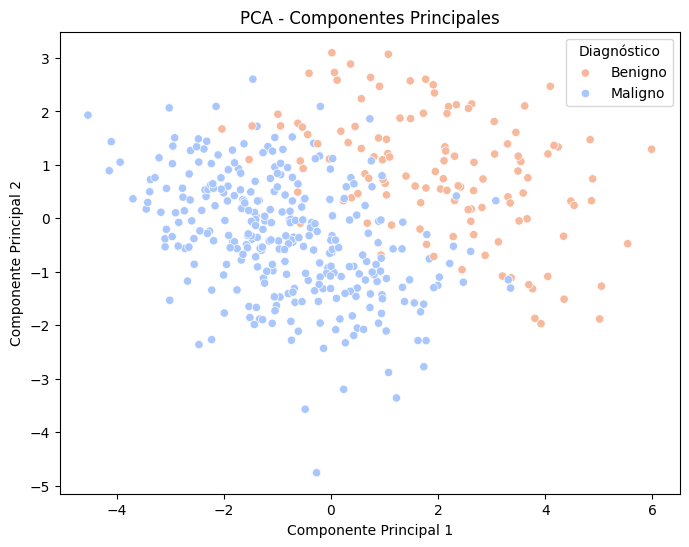

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='diagnosis', data=pca_df, palette='coolwarm')
plt.title('PCA - Componentes Principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Diagnóstico', labels=['Benigno', 'Maligno'])
plt.show()

 Aunque el análisis muestra que 7 componentes explican el 90% de la varianza, en un gráfico de dispersión solo podemos mostrar dos dimensiones. PC1 y PC2 se usan comúnmente en gráficos 2D porque son los más significativos para la visualización de los datos.

In [ ]:
import plotly.express as px

# Asumimos que tienes 'pca_df' con 'PC1', 'PC2' y 'diagnosis' correctamente definidos
fig = px.scatter(pca_df, x='PC1', y='PC2', color='diagnosis', template="simple_white")

# Título y tamaños
fig.update_layout(title='Distribución de Tumores Según Componentes Principales', title_font_size=18)
fig.update_traces(marker=dict(colorscale='Blues', colorbar=dict(title="Diagnóstico", tickvals=[0, 1], ticktext=['Benigno', 'Maligno'])))
fig.update_xaxes(showgrid=False, zeroline=True, zerolinewidth=3, zerolinecolor='lightgray')
fig.update_yaxes(showgrid=False, zeroline=True, zerolinewidth=3, zerolinecolor='lightgray')

# Actualizar títulos de ejes
fig.update_xaxes(title=f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
fig.update_yaxes(title=f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')

# Mostrar el gráfico
fig.show()



## 4.8 Varianza Explicada por Cada Componente

Finalmente, imprimimos la cantidad de varianza explicada por cada uno de los primeros 7 componentes para entender cuánta información capturan.

In [ ]:
print(f"Varianza explicada por los primeros {numero_componentes} componentes:")
print(pca.explained_variance_ratio_)

Varianza explicada por los primeros 7 componentes:
[0.39080766 0.15304403 0.12175485 0.07601738 0.06762885 0.06244143
 0.02873526]


Cada número en la salida de pca.explained_variance_ratio_ representa la cantidad de varianza explicada por cada componente. Los primeros componentes (como PC1) explican una mayor parte de la varianza, y los siguientes componentes explican progresivamente menos.

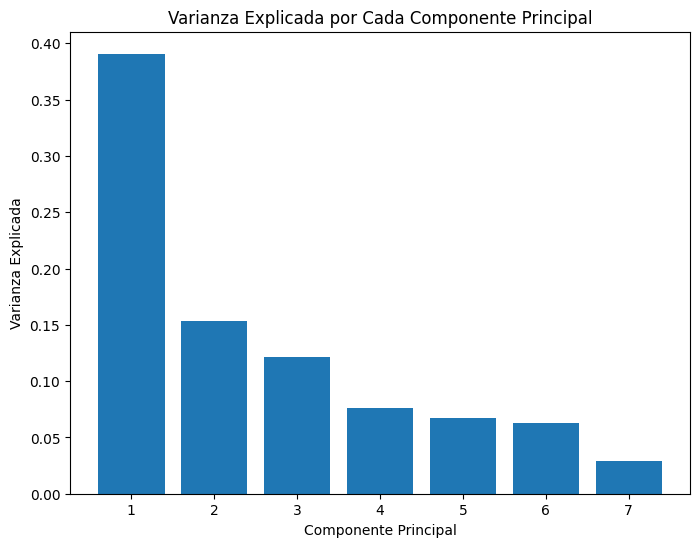

In [ ]:
# Graficar la varianza explicada por cada componente
plt.figure(figsize=(8,6))
plt.bar(range(1, numero_componentes + 1), pca.explained_variance_ratio_)
plt.xlabel('Componente Principal')
plt.ylabel('Varianza Explicada')
plt.title('Varianza Explicada por Cada Componente Principal')
plt.show()

# 5. Modelos predictivos para clasificación de tumores

## 5.1 Regresión logística

La Regresión Logística es un algoritmo de Machine Learning supervisado utilizado para resolver problemas de clasificación binaria, es decir, cuando queremos predecir si una observación pertenece a una de dos categorías.



El objetivo es usar regresión logística para predecir si un tumor es benigno o maligno basándonos en los componentes principales obtenidos a través de PCA.

### 5.1.1 División de Datos en Conjunto de Entrenamiento y Prueba

Separamos las características predictoras (`X`) de la variable objetivo (`y`). Para ello, eliminamos la columna diagnosis de pca_df y la almacenamos por separado.

In [ ]:
# Separar características (X) y variable objetivo (y)
X = pca_df.drop(columns=['diagnosis'])
y = pca_df['diagnosis']

Dividimos el conjunto de datos en dos partes: un 80% de los datos se utilizarán para entrenar el modelo y el 20% restante para evaluar su desempeño.

In [ ]:
# Dividir el dataset en 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 5.1.2 Entrenamiento del Modelo de Regresión Logística

Una vez separados los datos, procedemos a entrenar un modelo de Regresión Logística con la función `LogisticRegression()` de Scikit-Learn. Este modelo nos permite predecir la probabilidad de que un tumor sea maligno o benigno en función de las características de entrada.

El entrenamiento se realiza mediante el método `fit()`, el cual ajusta los parámetros del modelo utilizando los datos de entrenamiento` (X_train, y_train)`. Durante este proceso, el algoritmo aprende a asignar pesos a cada componente principal, de modo que pueda distinguir entre tumores benignos y malignos con alta precisión.


In [ ]:
# Inicializar y entrenar el modelo
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

### 5.1.3 Evaluación del Modelo

Después de entrenar el modelo, realizamos predicciones en el conjunto de prueba `(X_test)` usando el método `predict()`.

In [ ]:
# Predicción en el conjunto de prueba
y_pred = log_reg.predict(X_test)

Evaluamos el rendimiento del modelo mediante tres métricas principales: precisión `(accuracy)`, el reporte de clasificación y la matriz de confusión.

**5.1.3.1 Precisión y Reporte de Clasificación**

In [ ]:
# Calcular precisión y reporte de clasificación
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2%}")
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

Precisión del modelo: 98.84%

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        63
           1       0.96      1.00      0.98        23

    accuracy                           0.99        86
   macro avg       0.98      0.99      0.99        86
weighted avg       0.99      0.99      0.99        86



**Precisión y Reporte de Clasificación**

- Precisión del Modelo: La precisión general del modelo es 98.84%. Esto indica que el modelo clasificó correctamente el 98.84% de los tumores en el conjunto de prueba.


- Reporte de Clasificación:

  - Para los tumores benignos (clase 0):

    - Precisión: 100% (lo que significa que todas las predicciones de tumores benignos fueron correctas).

    - Recall: 98% (el modelo identificó correctamente el 98% de los tumores benignos).

    - F1-score: 99% (buena combinación entre precisión y recall).

  - Para los tumores malignos (clase 1):

    - Precisión: 96% (el 96% de las predicciones de tumores malignos fueron correctas).

    - Recall: 100% (el modelo identificó correctamente todos los tumores malignos).

    - F1-score: 98% (buena combinación entre precisión y recall).

**5.1.3.2 Matriz de Confusión**

Para entender mejor los errores cometidos por el modelo, analizamos la matriz de confusión. En esta matriz, la diagonal principal representa las predicciones correctas, mientras que los valores fuera de la diagonal indican errores de clasificación.

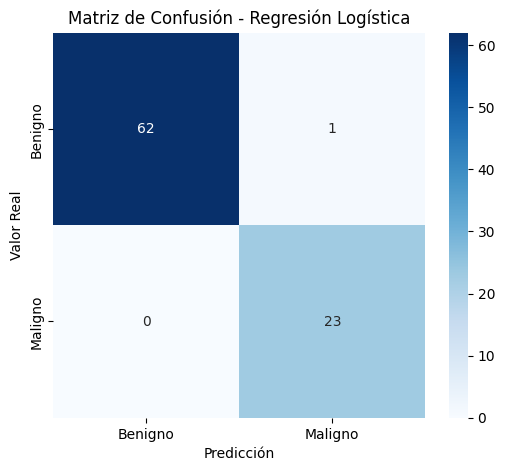

In [ ]:
# Mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benigno', 'Maligno'], yticklabels=['Benigno', 'Maligno'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - Regresión Logística')
plt.show()

**Matriz de Confusión**

La matriz de confusión muestra que:

- 63 tumores benignos fueron correctamente clasificados como benignos (verdaderos positivos).

- 23 tumores malignos fueron correctamente clasificados como malignos (verdaderos negativos).

- 1 tumor benigno fue incorrectamente clasificado como maligno (falso positivo).

- No hubo falsos negativos, lo que es ideal porque significa que no se pasó por alto ningún tumor maligno.

### 5.1.3.3 Curva ROC

La curva ROC (Receiver Operating Characteristic) permite evaluar la capacidad del modelo para diferenciar entre tumores benignos y malignos. Se graficó la tasa de verdaderos positivos frente a la tasa de falsos positivos para distintos umbrales de decisión.

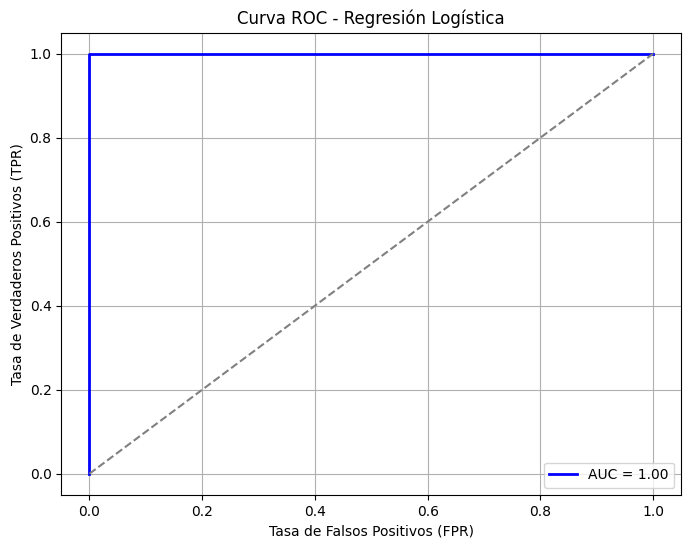

In [ ]:

from sklearn.metrics import roc_curve, auc

# Calcular las probabilidades de predicción
y_proba = log_reg.predict_proba(X_test)[:, 1]

# Calcular las tasas de verdaderos positivos y falsos positivos
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Calcular el área bajo la curva (AUC)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Regresión Logística')
plt.legend(loc='lower right')
plt.grid()
plt.show()

El área bajo la curva (AUC) obtenida es de 1.00, indicando que el modelo tiene una capacidad de clasificación perfecta, sin errores en la separación de las dos clases.

**5.1.3.4 Curva de Aprendizaje**

La curva de aprendizaje representa la evolución de la precisión del modelo a medida que aumenta el tamaño del conjunto de entrenamiento. Se han representado tanto la precisión en entrenamiento como en validación.

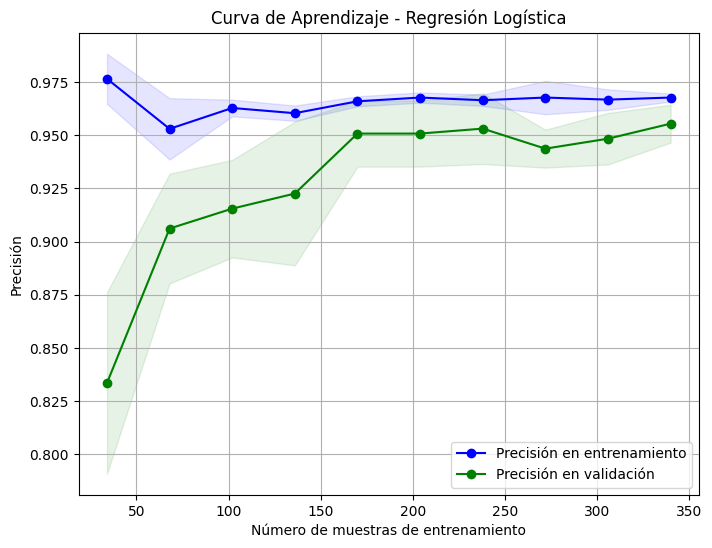

In [ ]:
from sklearn.model_selection import learning_curve

# Definir tamaños de muestra para construir la curva
train_sizes, train_scores, test_scores = learning_curve(
    log_reg, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calcular medias y desviaciones estándar
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Graficar la curva de aprendizaje
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Precisión en entrenamiento')
plt.plot(train_sizes, test_mean, 'o-', color='green', label='Precisión en validación')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='green')
plt.xlabel('Número de muestras de entrenamiento')
plt.ylabel('Precisión')
plt.title('Curva de Aprendizaje - Regresión Logística')
plt.legend(loc='best')
plt.grid()
plt.show()

La gráfica muestra que:

- La precisión en entrenamiento es alta y estable.

- La precisión en validación también es alta, con ligeras variaciones normales debido a la variabilidad de los datos.

- La separación entre las dos curvas no es excesiva.

Esto sugiere que el modelo generaliza bien y que no existe un sobreajuste notable.

**5.1.3.5 Diagnóstico de Sobreajuste**

El análisis de la curva de aprendizaje muestra que la precisión en el conjunto de validación se mantiene alta y cercana a la precisión en el conjunto de entrenamiento, lo que indica que el modelo no sufre de sobreajuste significativo.

Además, la curva ROC confirma un excelente poder discriminativo del modelo, con un AUC de 1.00.

Por lo tanto, se concluye que el modelo de Regresión Logística ofrece un rendimiento robusto y una alta capacidad de generalización sobre datos no vistos.

### 5.1.4 Validación cruzada

La validación cruzada es una técnica que permite evaluar el rendimiento del modelo en diferentes particiones del conjunto de datos. En lugar de usar solo una partición de los datos (como en el conjunto de prueba), la validación cruzada divide los datos en k subconjuntos (también llamados "folds") y entrena el modelo k veces, cada vez usando k-1 subconjuntos para el entrenamiento y el subconjunto restante para la prueba.

In [ ]:
# Validación cruzada con 5 particiones
cv_scores = cross_val_score(log_reg, X, y, cv=5)

# Mostrar la precisión de cada partición
print("Precisión en cada partición de validación cruzada:")
for i, score in enumerate(cv_scores, 1):
    print(f"Precisión en partición {i}: {score*100:.2f}%")

# Mostrar la precisión media en validación cruzada
print(f"\nPrecisión media en validación cruzada: {cv_scores.mean()*100:.2f}%")

Precisión en cada partición de validación cruzada:
Precisión en partición 1: 96.51%
Precisión en partición 2: 95.29%
Precisión en partición 3: 95.29%
Precisión en partición 4: 94.12%
Precisión en partición 5: 96.47%

Precisión media en validación cruzada: 95.54%


La precisión media en validación cruzada es 95.54%, lo que indica que el modelo tiene una capacidad de generalización bastante sólida, ya que los resultados en las distintas particiones son consistentes.



## 5.2 SVM

La Máquina de Vectores de Soporte (Support Vector Machine, SVM) es un algoritmo de Machine Learning supervisado utilizado para resolver problemas de clasificación binaria. Su objetivo es encontrar el hiperplano óptimo que separa las clases de datos con el máximo margen posible.

El objetivo es usar SVM para predecir si un tumor es benigno o maligno basándonos en los componentes principales obtenidos a través de PCA.

### 5.2.1 División de Datos en Conjunto de Entrenamiento y Prueba

En este apartado se utilizan las mismas divisiones de datos que en el modelo anterior, basados en los datos transformados por PCA. El conjunto de datos se ha separado en un 80% para entrenamiento (`X_train`, `y_train`) y un 20% para prueba (`X_test`, `y_test`).



### 5.2.2 Entrenamiento del Modelo de SVM

Se ha entrenado un modelo de Máquina de Vectores de Soporte utilizando un kernel RBF (Radial Basis Function). Este tipo de kernel permite capturar relaciones no lineales entre las variables, adaptándose mejor a la complejidad de los datos de cáncer de mama. Se ha añadido `probability=True` para poder calcular la curva ROC posteriormente.

In [ ]:
from sklearn.svm import SVC

# Inicializar y entrenar el modelo
svm_model = SVC(probability=True,  kernel='rbf')  # importante añadir probability=True para curva ROC
svm_model.fit(X_train, y_train)

SVC(probability=True)

### 5.2.3 Evaluación del Modelo

Una vez entrenado el modelo, se procede a su evaluación a través de distintas métricas e imágenes de análisis.

In [ ]:
# Predicción en el conjunto de prueba
y_pred_svm  = svm_model.predict(X_test)

**5.2.3.1 Precisión y Reporte de Clasificación**

Se realiza la predicción en el conjunto de prueba (`X_test`) y se calcula el accuracy general, así como el reporte de clasificación que incluye precisión, recall y f1-score para cada clase.

In [ ]:
# Calcular precisión y reporte de clasificación
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Precisión del modelo (SVM): {accuracy_svm:.2%}")
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_svm))

Precisión del modelo (SVM): 97.67%

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        63
           1       0.96      0.96      0.96        23

    accuracy                           0.98        86
   macro avg       0.97      0.97      0.97        86
weighted avg       0.98      0.98      0.98        86



El modelo SVM obtiene una precisión del 97.67%, clasificando correctamente la mayoría de los tumores. Tanto la precisión como el recall son altos para ambas clases (benigno y maligno), indicando un excelente desempeño general.


**5.2.3.2 Matriz de Confusión**

Se representa la matriz de confusión mediante un mapa de calor.

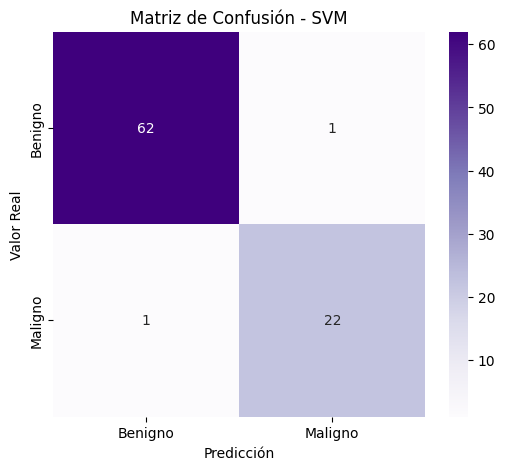

In [ ]:
# Mostrar la matriz de confusión
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Purples', xticklabels=['Benigno', 'Maligno'], yticklabels=['Benigno', 'Maligno'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - SVM')
plt.show()

La matriz de confusión muestra que de 86 muestras:

- 62 tumores benignos fueron correctamente clasificados como benignos.

- 22 tumores malignos fueron correctamente clasificados como malignos.

- Solo 2 errores (1 tumor benigno clasificado como maligno y 1 maligno como benigno).

Estos resultados confirman el alto nivel de precisión del modelo.

**5.2.3.3 Curva ROC**

Se genera la curva ROC a partir de las probabilidades de predicción y se calcula el área bajo la curva (AUC).

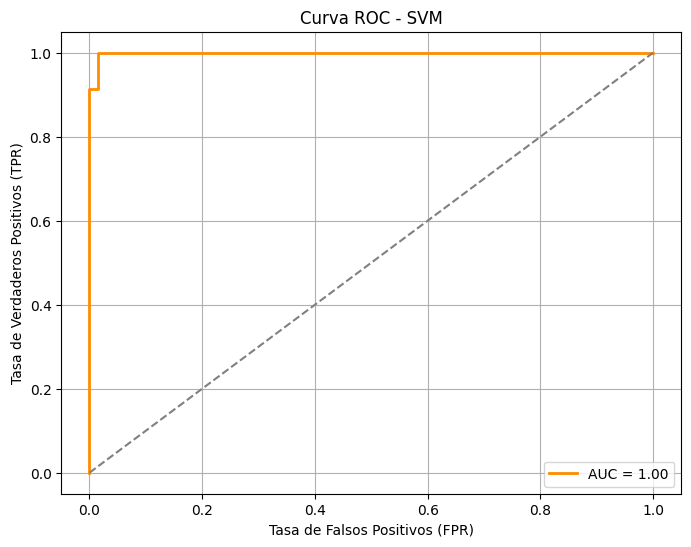

In [ ]:
y_proba_svm = svm_model.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_proba_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure(figsize=(8,6))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'AUC = {roc_auc_svm:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - SVM')
plt.legend(loc='lower right')
plt.grid()
plt.show()

La curva ROC muestra una AUC de 1.00, lo que significa que el modelo distingue perfectamente entre tumores benignos y malignos. Esto refleja un desempeño óptimo del clasificador SVM con kernel RBF.

**5.2.3.4 Curva de Aprendizaje**

Se representa la curva de aprendizaje mostrando cómo varía la precisión en entrenamiento y validación a medida que se incrementa el tamaño del conjunto de entrenamiento.

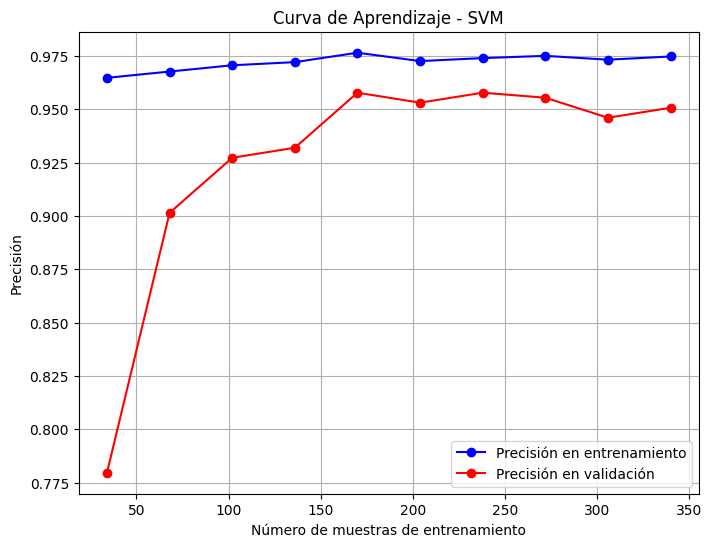

In [ ]:
train_sizes_svm, train_scores_svm, test_scores_svm = learning_curve(
    svm_model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean_svm = np.mean(train_scores_svm, axis=1)
test_mean_svm = np.mean(test_scores_svm, axis=1)

plt.figure(figsize=(8,6))
plt.plot(train_sizes_svm, train_mean_svm, 'o-', color='blue', label='Precisión en entrenamiento')
plt.plot(train_sizes_svm, test_mean_svm, 'o-', color='red', label='Precisión en validación')
plt.xlabel('Número de muestras de entrenamiento')
plt.ylabel('Precisión')
plt.title('Curva de Aprendizaje - SVM')
plt.legend(loc='best')
plt.grid()
plt.show()

La curva de aprendizaje muestra que:

- La precisión en entrenamiento es consistentemente alta (cerca del 97%).

- La precisión en validación también es elevada (alrededor del 95%).

- No hay separación excesiva entre ambas curvas.

Esto indica que el modelo no sufre de sobreajuste y generaliza bien a nuevos datos.



### 5.2.4 Validación cruzada

Se realiza una validación cruzada con 5 particiones (`5-fold cross-validation`) para evaluar la estabilidad del modelo.

In [ ]:
cv_scores_svm = cross_val_score(svm_model, X, y, cv=5)

print("Precisión en cada partición de validación cruzada (SVM):")
for i, score in enumerate(cv_scores_svm, 1):
    print(f"Precisión en partición {i}: {score*100:.2f}%")

print(f"\nPrecisión media en validación cruzada (SVM): {cv_scores_svm.mean()*100:.2f}%")

Precisión en cada partición de validación cruzada (SVM):
Precisión en partición 1: 96.51%
Precisión en partición 2: 95.29%
Precisión en partición 3: 95.29%
Precisión en partición 4: 95.29%
Precisión en partición 5: 95.29%

Precisión media en validación cruzada (SVM): 95.54%


La precisión media obtenida en la validación cruzada es de 95.54%, con resultados muy similares entre particiones. Esto demuestra que el modelo tiene un rendimiento sólido y consistente en diferentes subconjuntos de datos.

### 5.2.5 Fronteras de Decisión del Modelo SVM

Se representan las fronteras de decisión del SVM para distintos valores del parámetro `C` (0.01, 0.1, 1, 10 y 100) usando solo los dos primeros componentes principales (`PCA1` y `PCA2`).

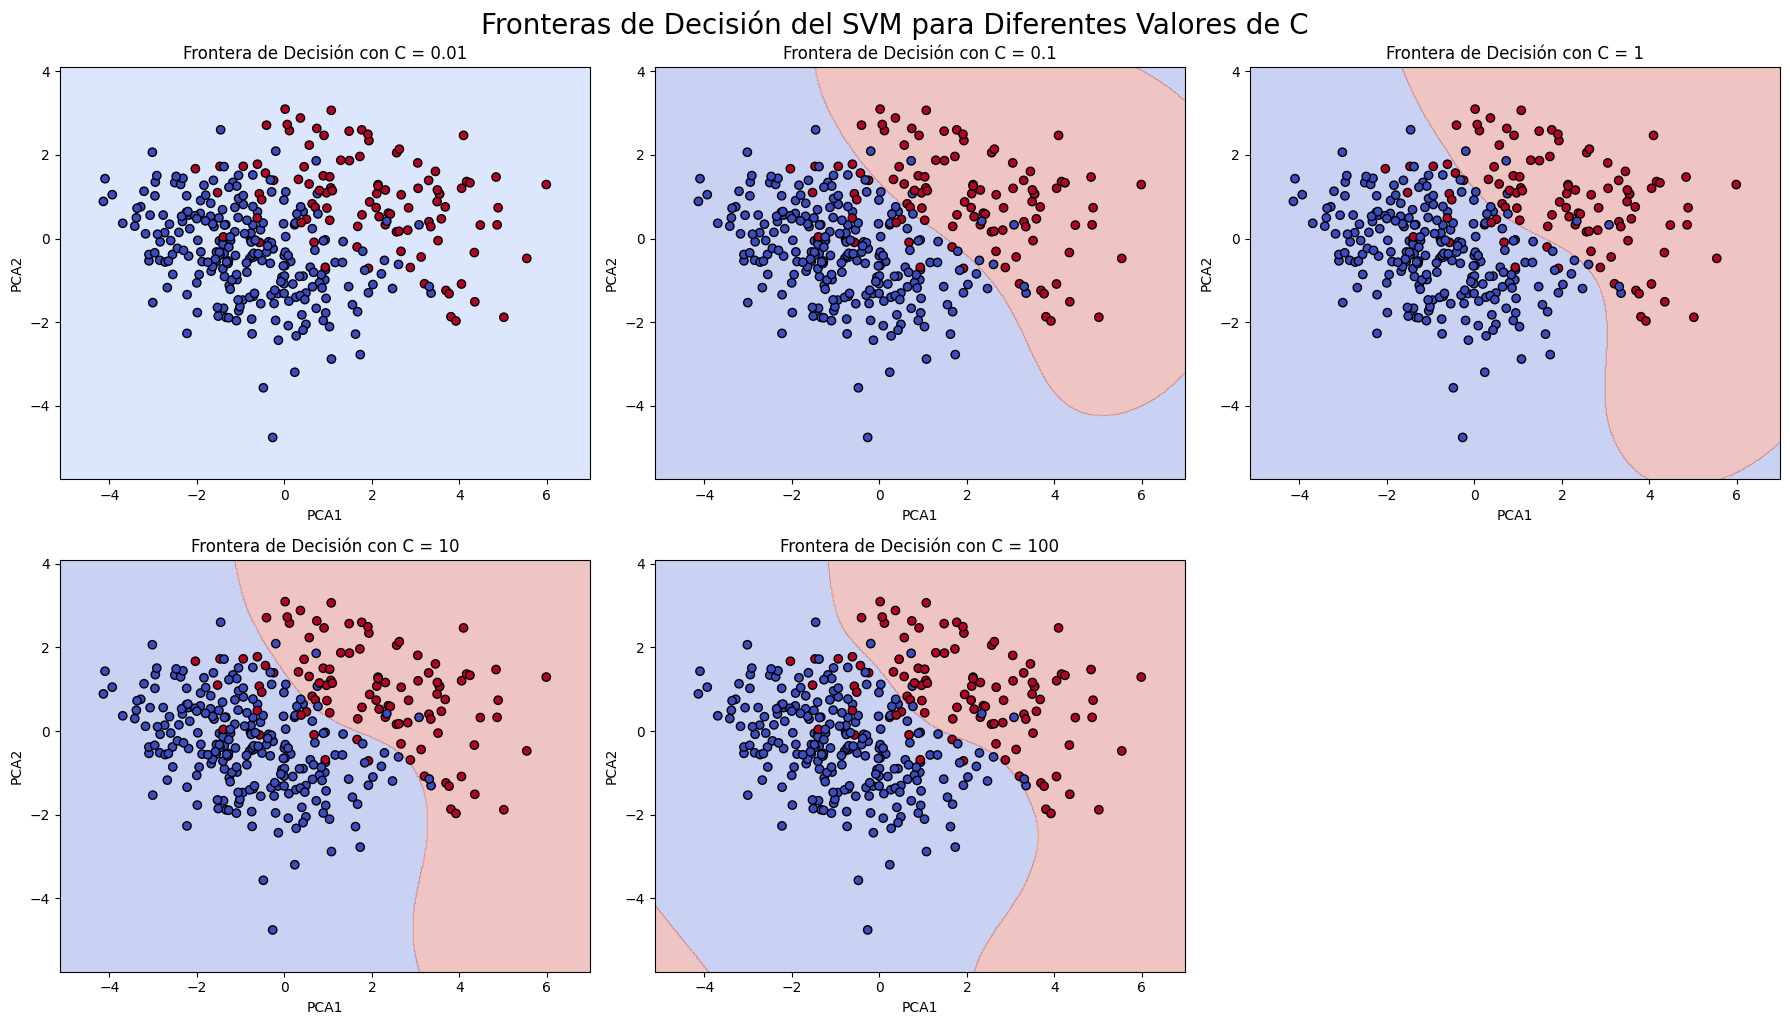

In [ ]:
X_vis = X_train.iloc[:, :2].values
y_vis = y_train.values

C_values = [0.01, 0.1, 1, 10, 100]

x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

plt.figure(figsize=(18, 10))

for i, C in enumerate(C_values, 1):
    svm_model_c = SVC(C=C, kernel='rbf')
    svm_model_c.fit(X_vis, y_vis)

    Z = svm_model_c.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.subplot(2, 3, i)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, cmap='coolwarm', edgecolors='k')
    plt.title(f'Frontera de Decisión con C = {C}')
    plt.xlabel('PCA1')
    plt.ylabel('PCA2')

plt.tight_layout()
plt.suptitle('Fronteras de Decisión del SVM para Diferentes Valores de C', fontsize=20, y=1.02)
plt.show()

En la visualización:

- Para valores bajos de C (0.01 y 0.1), el modelo permite mayores márgenes, lo que genera fronteras más suaves pero más permisivas.

- A medida que C aumenta (1, 10, 100), las fronteras se vuelven más estrictas y se ajustan mejor a los datos, reduciendo los errores de clasificación.

Esto ilustra cómo el parámetro C regula el equilibrio entre la flexibilidad del modelo y la penalización de errores, y cómo influye directamente en la complejidad de la frontera de decisión.

## 5.3 KNN

La clasificación por K-Vecinos Más Cercanos (K-Nearest Neighbors, KNN) es un algoritmo de Machine Learning supervisado que predice la categoría de una nueva observación basándose en las clases de las observaciones más cercanas. Su simplicidad y efectividad lo convierten en una técnica popular, especialmente cuando se trabaja con datasets pequeños o medianos.

En este caso, se utiliza KNN para predecir si un tumor es benigno o maligno a partir de los componentes principales obtenidos previamente mediante PCA.

### 5.3.1 División de Datos en Conjunto de Entrenamiento y

Se utilizan los mismos conjuntos de datos de entrenamiento (`X_train`, `y_train`) y prueba (`X_test`, `y_test`) que en los apartados anteriores. Estos datos ya han sido procesados mediante reducción de dimensionalidad con PCA.




### 5.3.2 Búsqueda del Mejor Número de Vecinos (k)

Antes de entrenar el modelo definitivo, se realiza una búsqueda para encontrar el número óptimo de vecinos (`k`) que maximiza la precisión del modelo. Para ello, se realiza una validación cruzada de 5 particiones (`5-fold`) evaluando valores de `k` desde 1 hasta 20.

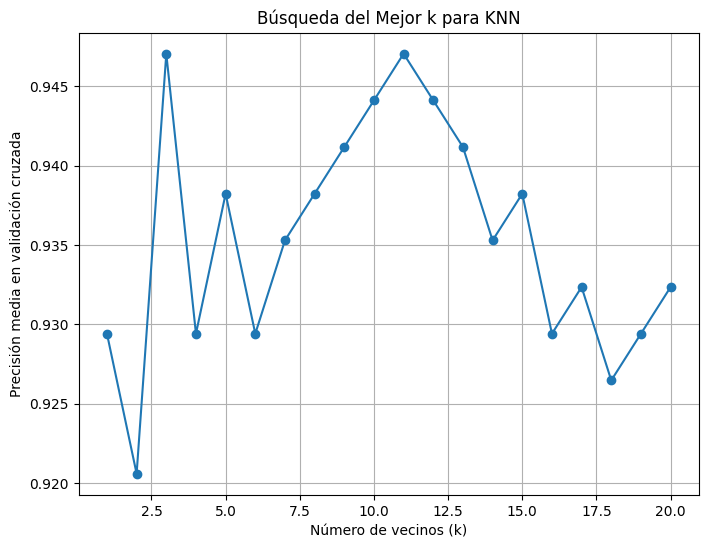

El mejor número de vecinos es: 3 con una precisión media de 94.71%


In [ ]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# Probar valores de k del 1 al 20
k_values = range(1, 21)
k_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5)
    k_scores.append(scores.mean())

# Graficar precisión vs. número de vecinos
plt.figure(figsize=(8,6))
plt.plot(k_values, k_scores, marker='o')
plt.xlabel('Número de vecinos (k)')
plt.ylabel('Precisión media en validación cruzada')
plt.title('Búsqueda del Mejor k para KNN')
plt.grid(True)
plt.show()

# Mejor k
best_k = k_values[np.argmax(k_scores)]
print(f"El mejor número de vecinos es: {best_k} con una precisión media de {max(k_scores)*100:.2f}%")


La gráfica muestra cómo varía la precisión media en validación cruzada para distintos valores de `k`. Se observa que para valores bajos de `k`, la precisión puede ser alta pero inestable. El valor de `k=3` es seleccionado porque maximiza la precisión media (94.71%) de forma más robusta, reduciendo el riesgo de sobreajuste.

### 5.3.3 Entrenamiento del Modelo de KNN


Una vez encontrado el `k` óptimo, se entrena el modelo definitivo.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Entrenar el modelo definitivo con el mejor k
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### 5.3.4 Evaluación del Modelo

Se evalúa el modelo entrenado usando el conjunto de prueba `X_test` y `y_test`, utilizando distintas métricas y representaciones gráficas.

**5.3.4.1 Precisión y Reporte de Clasificación**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Predicción en el conjunto de prueba
y_pred_knn = knn_model.predict(X_test)

# Calcular precisión y reporte de clasificación
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Precisión del modelo (KNN): {accuracy_knn:.2%}")
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_knn))


Precisión del modelo (KNN): 100.00%

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00        23

    accuracy                           1.00        86
   macro avg       1.00      1.00      1.00        86
weighted avg       1.00      1.00      1.00        86



El modelo KNN obtiene una precisión del 100% en el conjunto de prueba. Todos los tumores fueron correctamente clasificados como benignos o malignos, lo que se refleja en valores perfectos (1.00) de precisión, recall y f1-score.

**5.3.4.2 Matriz de Confusión**

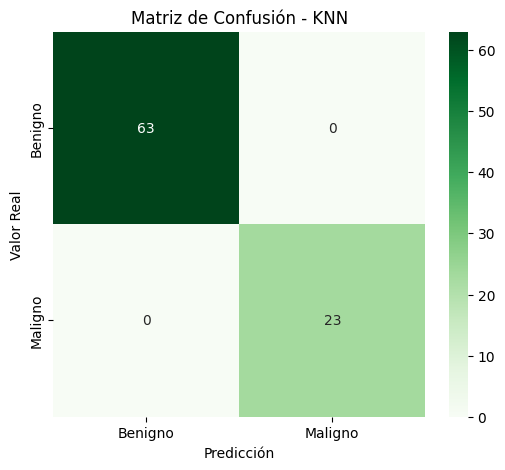

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Mostrar la matriz de confusión
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Greens', xticklabels=['Benigno', 'Maligno'], yticklabels=['Benigno', 'Maligno'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - KNN')
plt.show()


La matriz de confusión muestra una clasificación perfecta: 63 tumores benignos y 23 malignos fueron clasificados correctamente, sin errores de predicción. Todos los datos se encuentran sobre la diagonal principal, confirmando un rendimiento impecable del modelo en el conjunto de prueba.

**5.3.4.3 Curva ROC**

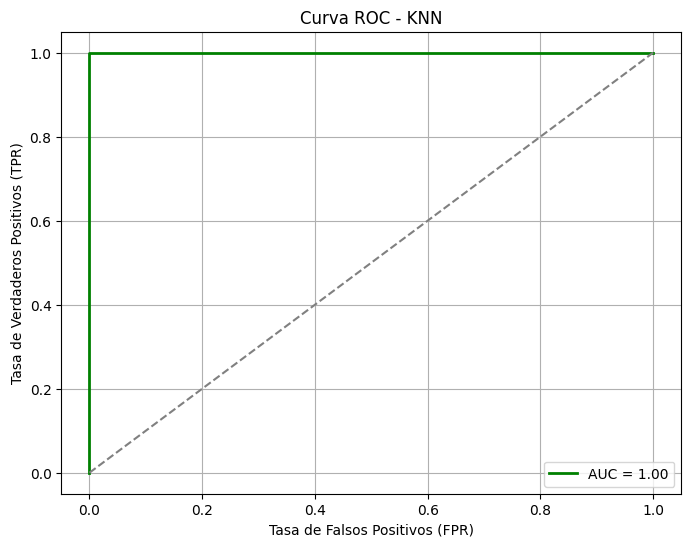

In [ ]:
from sklearn.metrics import roc_curve, auc

y_proba_knn = knn_model.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_proba_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure(figsize=(8,6))
plt.plot(fpr_knn, tpr_knn, color='green', lw=2, label=f'AUC = {roc_auc_knn:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - KNN')
plt.legend(loc='lower right')
plt.grid()
plt.show()


La curva ROC obtenida presenta un área bajo la curva (AUC) de 1.00, indicando que el modelo separa perfectamente entre tumores benignos y malignos sin errores de clasificación.

**5.3.4.4 Curva de Aprendizaje**

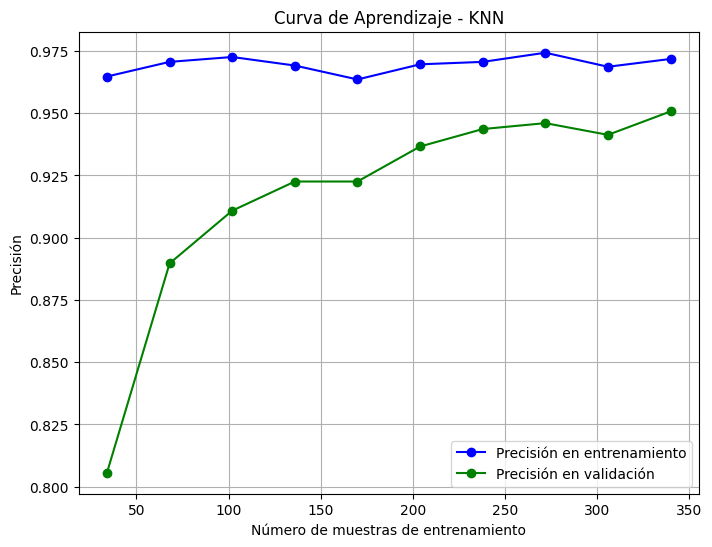

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes_knn, train_scores_knn, test_scores_knn = learning_curve(
    knn_model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean_knn = np.mean(train_scores_knn, axis=1)
test_mean_knn = np.mean(test_scores_knn, axis=1)

plt.figure(figsize=(8,6))
plt.plot(train_sizes_knn, train_mean_knn, 'o-', color='blue', label='Precisión en entrenamiento')
plt.plot(train_sizes_knn, test_mean_knn, 'o-', color='green', label='Precisión en validación')
plt.xlabel('Número de muestras de entrenamiento')
plt.ylabel('Precisión')
plt.title('Curva de Aprendizaje - KNN')
plt.legend(loc='best')
plt.grid()
plt.show()


La curva de aprendizaje muestra que la precisión en entrenamiento es alta y estable, mientras que la precisión en validación aumenta de manera progresiva hasta alcanzar valores cercanos al 95%. La diferencia entre ambas curvas es pequeña, indicando que el modelo generaliza bien y no sufre sobreajuste significativo.

### 5.3.5 Validación cruzada

In [ ]:
cv_scores_knn = cross_val_score(knn_model, X, y, cv=5)

print("Precisión en cada partición de validación cruzada (KNN):")
for i, score in enumerate(cv_scores_knn, 1):
    print(f"Precisión en partición {i}: {score*100:.2f}%")

print(f"\nPrecisión media en validación cruzada (KNN): {cv_scores_knn.mean()*100:.2f}%")


Precisión en cada partición de validación cruzada (KNN):
Precisión en partición 1: 95.35%
Precisión en partición 2: 94.12%
Precisión en partición 3: 97.65%
Precisión en partición 4: 94.12%
Precisión en partición 5: 94.12%

Precisión media en validación cruzada (KNN): 95.07%


El modelo KNN obtiene una precisión media del 95.07% en validación cruzada, con resultados muy consistentes en todas las particiones. Esto confirma la estabilidad y la capacidad de generalización del modelo.

### 5.3.6 Fronteras de Decisión del Modelo KNN para Diferentes Valores de k

inalmente, se representan las fronteras de decisión del modelo KNN para varios valores de `k` (1, 3, 5, 7 y 9), utilizando solo los dos primeros componentes principales (`PCA1` y `PCA2`).

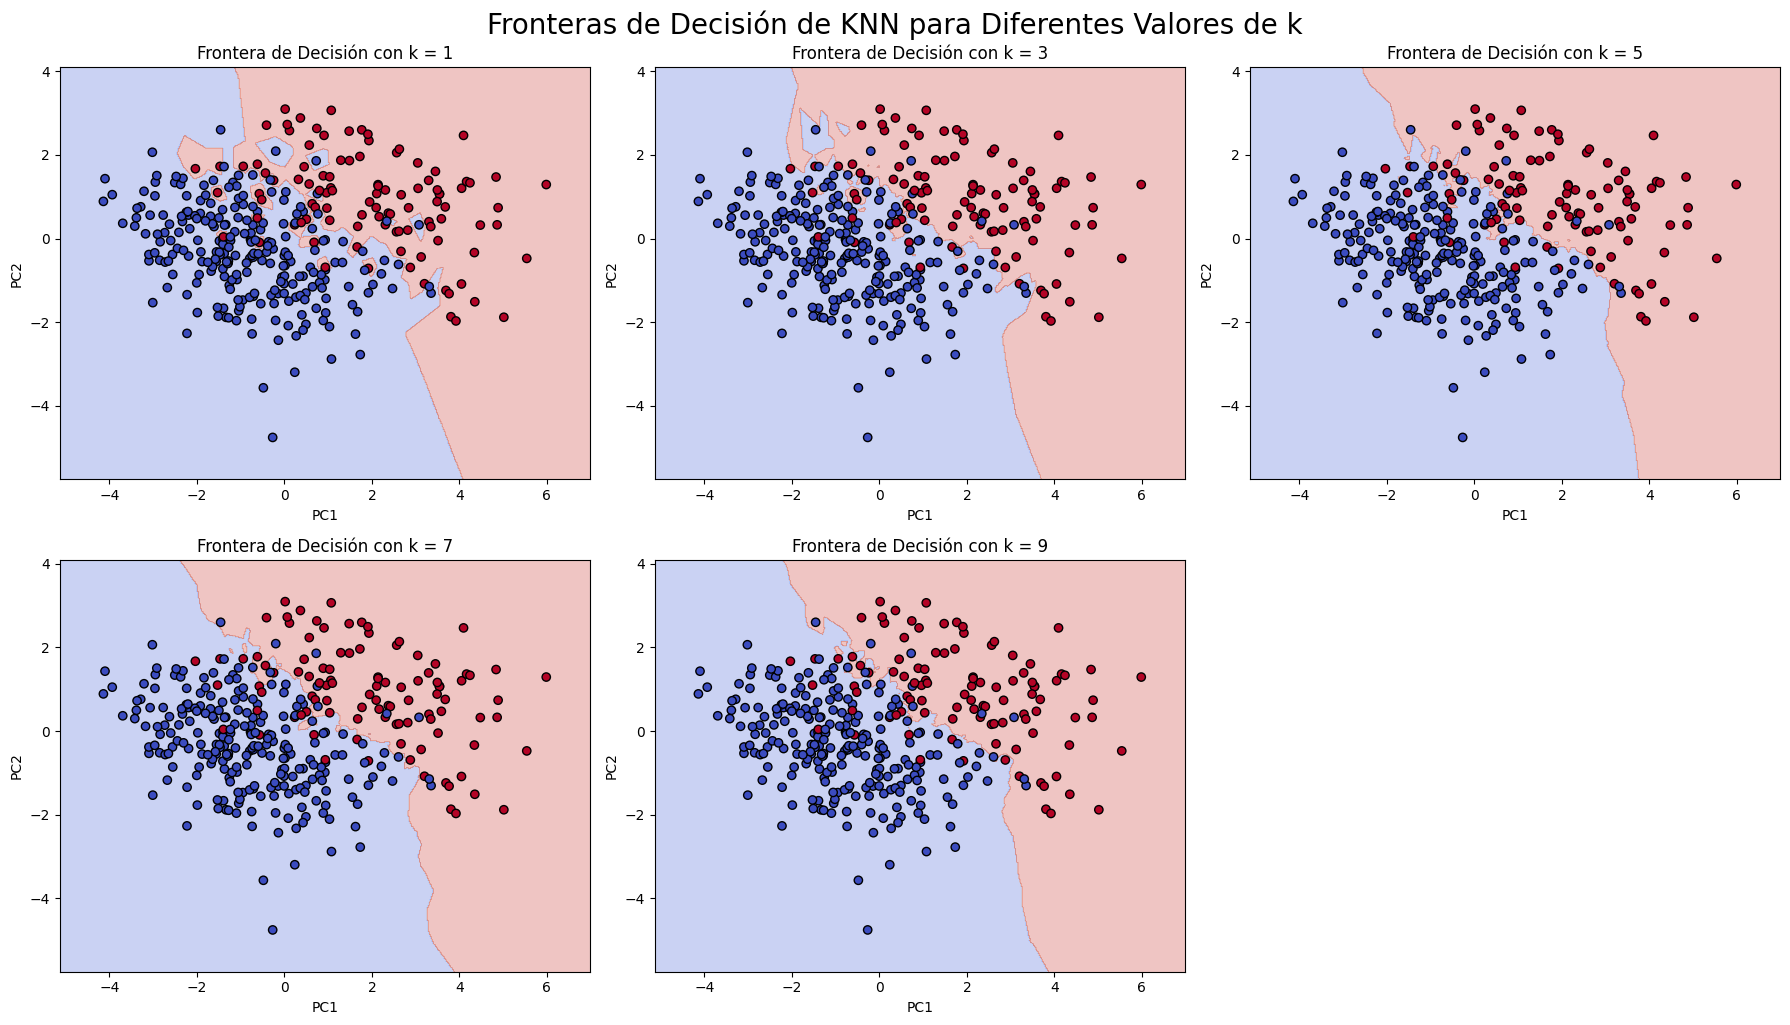

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# --- Datos para visualización ---
X_vis_knn = X_train.iloc[:, :2].values  # Dos primeras componentes principales
y_vis_knn = y_train.values

# Definir valores de k para comparar
k_values_vis = [1, 3, 5, 7, 9]

# Crear la malla
x_min, x_max = X_vis_knn[:, 0].min() - 1, X_vis_knn[:, 0].max() + 1
y_min, y_max = X_vis_knn[:, 1].min() - 1, X_vis_knn[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# --- Gráficas ---
plt.figure(figsize=(18, 10))

for i, k in enumerate(k_values_vis, 1):
    knn_model_k = KNeighborsClassifier(n_neighbors=k)
    knn_model_k.fit(X_vis_knn, y_vis_knn)

    Z = knn_model_k.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.subplot(2, 3, i)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X_vis_knn[:, 0], X_vis_knn[:, 1], c=y_vis_knn, cmap='coolwarm', edgecolors='k')
    plt.title(f'Frontera de Decisión con k = {k}')
    plt.xlabel('PC1')
    plt.ylabel('PC2')

plt.tight_layout()
plt.suptitle('Fronteras de Decisión de KNN para Diferentes Valores de k', fontsize=20, y=1.02)
plt.show()


Se observa que para valores pequeños de `k` (como `k=1`), las fronteras de decisión son muy irregulares y sensibles al ruido (sobreajuste). A medida que `k` aumenta (`k=5`, `k=7`, `k=9`), las fronteras se vuelven más suaves, favoreciendo la generalización del modelo y mejorando su robustez.

# 6. Segmentación de Pacientes mediante Clustering

En este capítulo, se utilizan técnicas de clustering no supervisado para agrupar a los pacientes con características similares, basándose en los componentes principales obtenidos mediante PCA. El objetivo es investigar si los grupos formados presentan relación con la agresividad del cáncer o características clínicas relevantes.

## 6.1 Aplicación de K-Means

El algoritmo K-Means es una técnica de agrupamiento no supervisada que organiza los datos en un número predeterminado de grupos (`k`) minimizando la distancia de cada punto a su centroide más cercano. En este apartado, se aplica K-Means sobre las componentes principales extraídas por PCA para identificar grupos de pacientes con características clínicas similares.

### 6.1.1 Preparación de los Datos para Clustering

Se utiliza el DataFrame `pca_df`, eliminando la variable `diagnosis` (etiqueta de benigno/maligno) para que el clustering sea completamente no supervisado. Solo se trabaja con las variables resultantes de la transformación PCA.

In [ ]:
# Preparar los datos para clustering (excluyendo la variable diagnosis)
X_cluster = pca_df.drop(columns=['diagnosis'])
y_cluster = pca_df['diagnosis']

### 6.1.2 Selección del Número Óptimo de Clusters: Método del Codo

Se utiliza el Método del Codo para determinar el número óptimo de clusters.
El código entrena modelos K-Means para valores de `k` del 1 al 10, almacenando la inercia (suma de las distancias cuadradas de los puntos a sus centroides), y luego representa gráficamente la evolución de la inercia en función de `k`.

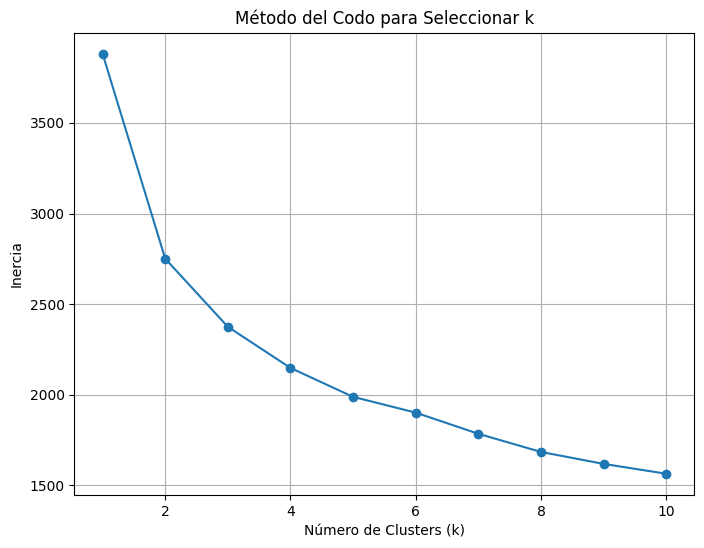

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_cluster)
    inertia.append(kmeans.inertia_)

# Representar el método del codo
plt.figure(figsize=(8,6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para Seleccionar k')
plt.grid(True)
plt.show()


En la gráfica, se observa que a partir de `k=2` la disminución de la inercia empieza a hacerse menos pronunciada, formando un "codo" claro. Esto sugiere que k=2 es un número adecuado de clusters para este conjunto de datos.

### 6.1.3 Aplicación de K-Means con el Número Óptimo de Clusters

Basándose en el resultado anterior, se entrena un modelo K-Means con `k=2` y se asigna cada paciente a uno de los dos clusters formados.

In [ ]:
# Aplicar K-Means con k=2
kmeans_final = KMeans(n_clusters=2, random_state=42)
clusters = kmeans_final.fit_predict(X_cluster)

# Añadir el resultado al DataFrame
pca_df['Cluster_KMeans'] = clusters

### 6.1.4 Visualización de los Clusters

Se representa la distribución de los pacientes en función de las dos primeras componentes principales (`PC1` y `PC2`), coloreando los puntos según el cluster asignado por K-Means.

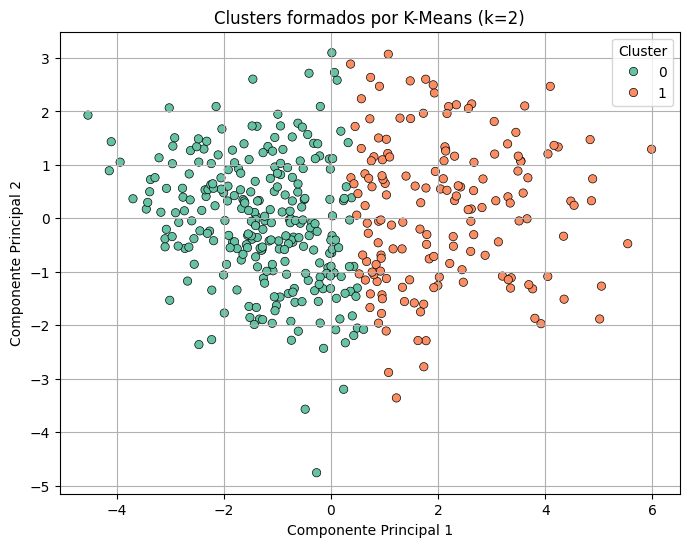

In [ ]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster_KMeans', data=pca_df, palette='Set2', edgecolor='k')
plt.title('Clusters formados por K-Means (k=2)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


Se observa una clara separación en el espacio de las dos primeras componentes principales entre los dos clusters formados. Aunque existen algunos pacientes en las zonas fronterizas, en general, los clusters presentan una segmentación razonable, indicando que el algoritmo ha encontrado patrones relevantes en las características clínicas de los pacientes.

### 6.1.5 Análisis de la Correspondencia entre Clusters y Diagnóstico

Finalmente, se evalúa en qué medida los clusters formados se corresponden con la clasificación clínica real (`diagnosis`). Para ello se calcula el Adjusted Rand Index (ARI), que mide la similitud entre dos asignaciones de grupos, ajustado por el azar.

In [ ]:
from sklearn.metrics import adjusted_rand_score

ari_kmeans = adjusted_rand_score(y_cluster, pca_df['Cluster_KMeans'])
print(f"Adjusted Rand Index (KMeans vs Diagnosis): {ari_kmeans:.2f}")


Adjusted Rand Index (KMeans vs Diagnosis): 0.38


El valor del Adjusted Rand Index (ARI) es 0.38, indicando una correspondencia moderada entre los clusters formados por K-Means y la clasificación clínica real. Aunque los clusters no reproducen perfectamente la variable `diagnosis`, sí capturan cierta estructura relacionada con la agresividad del tumor.

## 6.2 Aplicación de DBSCAN

El algoritmo DBSCAN (Density-Based Spatial Clustering of Applications with Noise) es un método de agrupamiento no supervisado que forma clusters basados en la densidad de puntos en el espacio. A diferencia de K-Means, DBSCAN no necesita especificar el número de clusters previamente, y puede detectar grupos de forma arbitraria y separar automáticamente los puntos considerados "ruido" o atípicos.

En este apartado se aplica DBSCAN sobre los componentes principales de las características clínicas de los pacientes.

### 6.2.1 Preparación de los Datos para Clustering

Se seleccionan las variables correspondientes a las componentes principales (`PC1`, `PC2`, etc.) eliminando las columnas relacionadas con el diagnóstico o resultados previos de clustering, para asegurar que el agrupamiento sea completamente no supervisado.

In [ ]:
# Preparar los datos (solo componentes principales)
X_cluster = pca_df.drop(columns=['diagnosis', 'Cluster_KMeans', 'Cluster_DBSCAN'], errors='ignore')

### 6.2.2 Cálculo del Mejor eps mediante Gráfico de K-distancia

Antes de aplicar DBSCAN, se utiliza el gráfico de la K-distancia para determinar el valor óptimo de `eps`. Se calcula la distancia al 5º vecino más cercano de cada punto, se ordenan esas distancias y se representan en un gráfico.

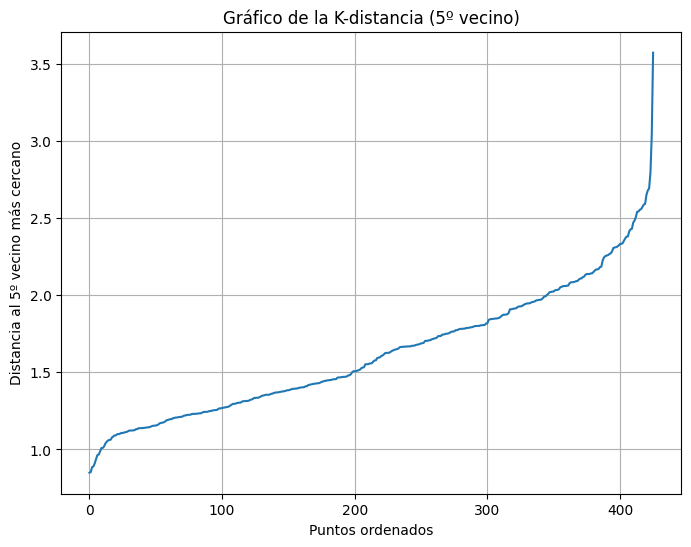

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Ajustar NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_cluster)

# Obtener distancias al 5º vecino más cercano
distances, indices = neighbors_fit.kneighbors(X_cluster)

# Ordenar las distancias
k_distances = np.sort(distances[:, 4])

# Graficar
plt.figure(figsize=(8,6))
plt.plot(k_distances)
plt.title('Gráfico de la K-distancia (5º vecino)')
plt.xlabel('Puntos ordenados')
plt.ylabel('Distancia al 5º vecino más cercano')
plt.grid(True)
plt.show()


El gráfico muestra que la curva comienza a ascender rápidamente alrededor de un valor de eps ≈ 1.8. Por tanto, se selecciona eps = 1.8 para aplicar DBSCAN, asegurando un buen equilibrio entre la detección de grupos densos y la exclusión de ruido.

### 6.2.3 Aplicación de DBSCAN con eps = 1.8 y min_samples = 5

Se aplica el algoritmo DBSCAN con los parámetros ajustados (`eps=1.8`, `min_samples=5`).

In [ ]:
from sklearn.cluster import DBSCAN

# Aplicar DBSCAN
dbscan = DBSCAN(eps=1.8, min_samples=5)  # estos valores se pueden ajustar
clusters_dbscan = dbscan.fit_predict(X_cluster)

# Añadir resultados al DataFrame
pca_df['Cluster_DBSCAN'] = clusters_dbscan

### 6.2.4 Visualización de los Clusters Encontrados

Se representa gráficamente el resultado del clustering de DBSCAN en el plano formado por las dos primeras componentes principales.

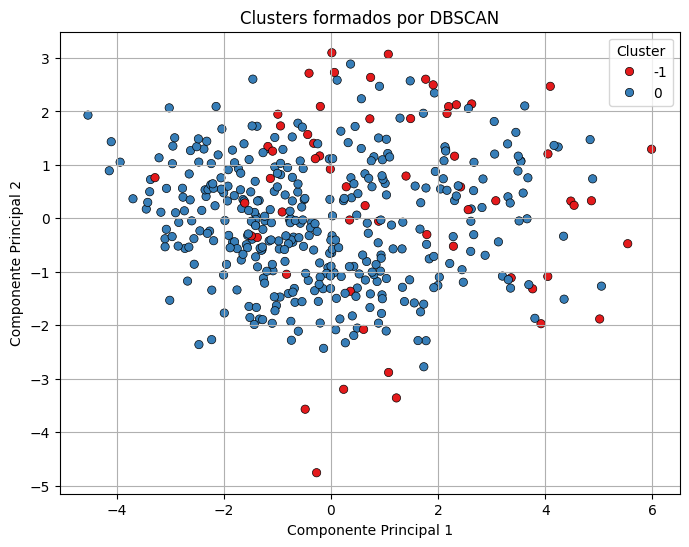

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster_DBSCAN', data=pca_df, palette='Set1', edgecolor='k')
plt.title('Clusters formados por DBSCAN')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

Se observa que la mayoría de los pacientes han sido asignados a un único cluster (cluster 0), mientras que otros han sido considerados puntos de ruido (cluster -1). Esto indica que, bajo los parámetros utilizados, DBSCAN ha identificado una gran zona densa de pacientes homogéneos, pero también ha detectado pacientes atípicos que no pertenecen claramente a ningún grupo.

### 6.2.5 Análisis de Correspondencia entre Clusters DBSCAN y Diagnóstico

Finalmente, se evalúa si los clusters formados tienen relación con el diagnóstico clínico (`diagnosis`) mediante el cálculo del Adjusted Rand Index (ARI).

In [ ]:
from sklearn.metrics import adjusted_rand_score

ari_dbscan = adjusted_rand_score(y_cluster, pca_df['Cluster_DBSCAN'])
print(f"Adjusted Rand Index (DBSCAN vs Diagnosis): {ari_dbscan:.2f}")

Adjusted Rand Index (DBSCAN vs Diagnosis): 0.10


El valor de ARI = 0.10 indica una baja correspondencia entre los grupos formados por DBSCAN y la clasificación real de los tumores. Esto sugiere que, aunque DBSCAN ha encontrado cierta estructura en los datos, esta no refleja fuertemente la separación clínica entre tumores benignos y malignos.

## 6.3 Comparación con Clustering Jerárquico

El clustering jerárquico es una técnica de agrupamiento no supervisado que crea una estructura en forma de árbol (dendrograma), donde cada fusión de puntos o grupos representa un nuevo nivel de agrupamiento.
Permite visualizar cómo los pacientes se agrupan progresivamente en función de su similitud, sin necesidad de predefinir el número de clusters.

En este apartado se aplica clustering jerárquico aglomerativo sobre los componentes principales de las características clínicas de los pacientes.

### 6.3.1 Preparación de los Datos

Se seleccionan las variables correspondientes a los componentes principales (`PC1`, `PC2`, etc.), excluyendo el diagnóstico (`diagnosis`) y cualquier clustering previo.

In [ ]:
# Preparar los datos (sin diagnosis ni clustering anteriores)
X_cluster_hierarchical = pca_df.drop(columns=['diagnosis', 'Cluster_KMeans', 'Cluster_DBSCAN'], errors='ignore')
y_cluster = pca_df['diagnosis']

### 6.3.2 Aplicación de Diferentes Métodos de Agrupamiento

Se aplican varios criterios de linkage para comparar cómo varía la estructura de los clusters:

- single

- complete

- average

- ward


Para cada método:

- Se calcula la estructura de clustering (linkage),

- Se representa el dendrograma,

- Se analiza la estructura jerárquica formada.

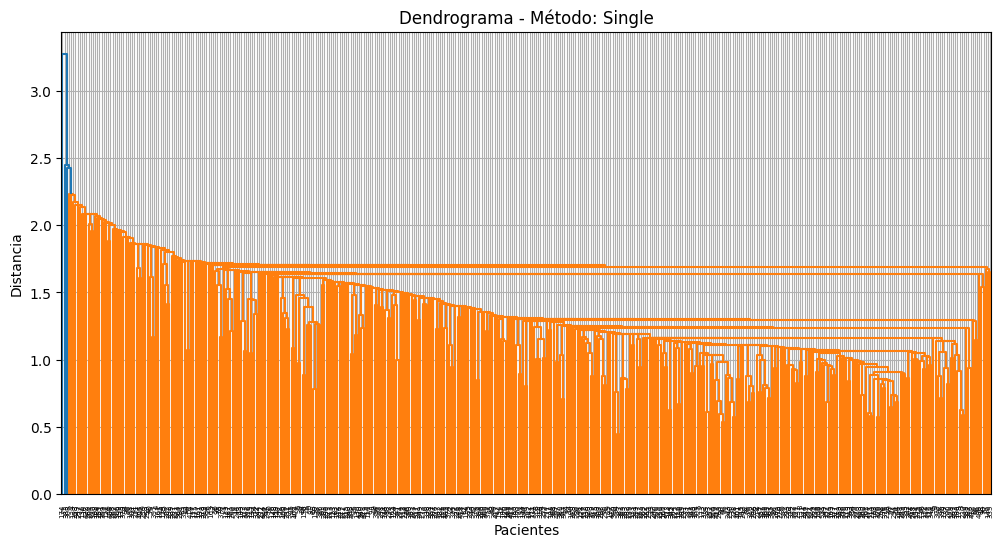

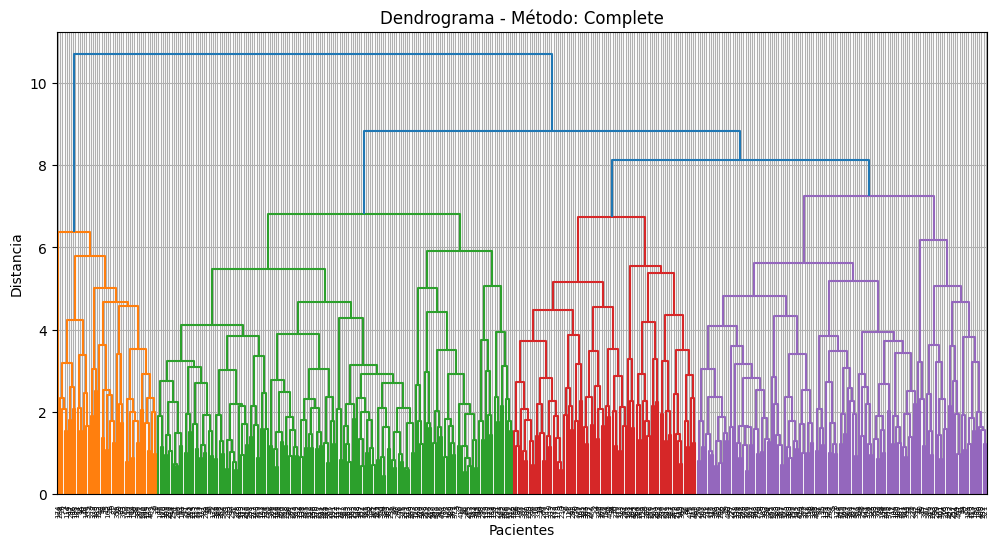

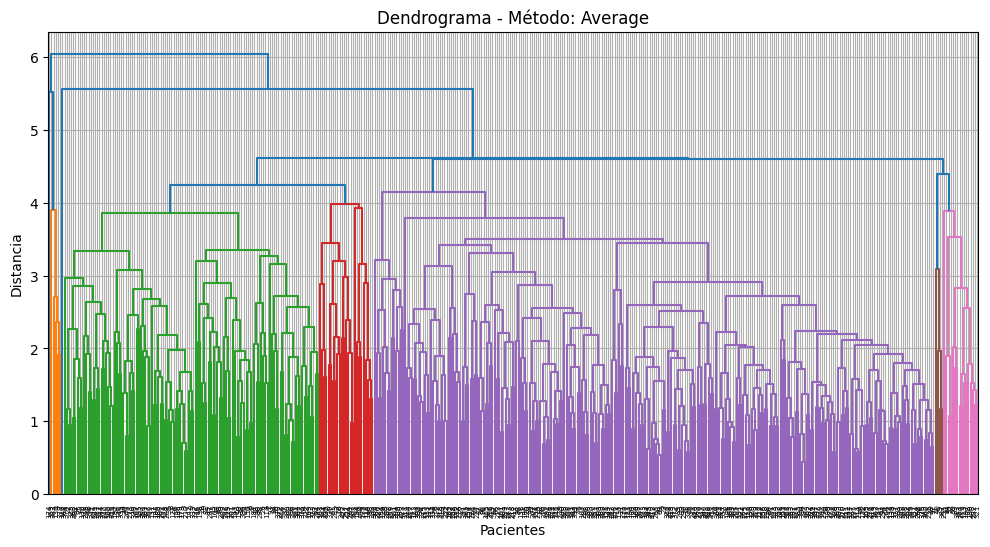

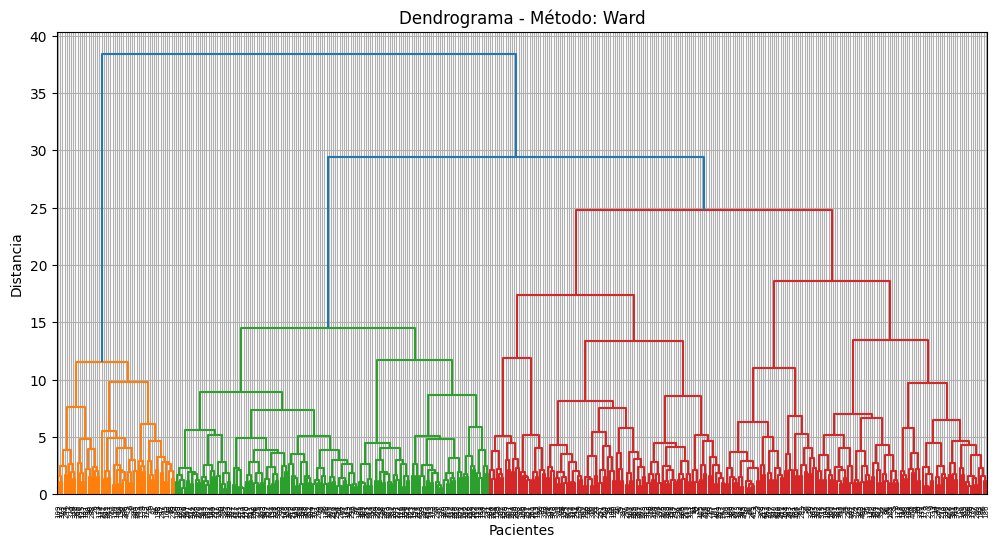

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt

# Métodos a probar
methods = ['single', 'complete', 'average', 'ward']

# Para guardar resultados
ari_results = {}

# Crear un dendrograma separado para cada método
for method in methods:
    linked = linkage(X_cluster_hierarchical, method=method)

    plt.figure(figsize=(12, 6))
    dendrogram(linked,
               orientation='top',
               distance_sort='ascending',
               show_leaf_counts=False)
    plt.title(f'Dendrograma - Método: {method.capitalize()}')
    plt.xlabel('Pacientes')
    plt.ylabel('Distancia')
    plt.grid(True)
    plt.show()

Al observar los dendrogramas obtenidos mediante los diferentes métodos de linkage `(single`, `complete`, `average` y `ward`), se aprecia un comportamiento claramente diferenciado:

El método single linkage tiende a formar agrupaciones en forma de cadenas largas (fenómeno conocido como chaining), lo que dificulta la identificación de grupos compactos de pacientes. En cambio, el método complete linkage genera clusters más compactos y bien separados, proporcionando una estructura de agrupamiento más clara.

Por su parte, el método average linkage ofrece una solución intermedia: los agrupamientos son relativamente equilibrados, aunque no tan definidos como en complete linkage. Finalmente, el método ward linkage, basado en la minimización de la varianza interna, produce dendrogramas donde las separaciones entre clusters son más amplias y definidas, sugiriendo agrupaciones más naturales en el espacio de componentes principales.

En general, tanto complete como ward muestran estructuras jerárquicas más adecuadas para separar a los pacientes en función de sus características clínicas.

### 6.3.3 Corte de los Dendrogramas en 2 Clusters

Para hacer una comparación justa con los otros métodos (K-Means, DBSCAN), se fuerza el corte de todos los dendrogramas en 2 clusters.

In [ ]:
for method in methods:
    # Calcular linkage
    linked = linkage(X_cluster_hierarchical, method=method)

    # Cortar el dendrograma para formar 2 clusters
    clusters = fcluster(linked, t=2, criterion='maxclust')

    # Calcular ARI
    ari = adjusted_rand_score(y_cluster, clusters)
    ari_results[method] = ari

# Mostrar resultados
for method, ari in ari_results.items():
    print(f"Adjusted Rand Index (Método {method.capitalize()} vs Diagnosis): {ari:.2f}")


Adjusted Rand Index (Método Single vs Diagnosis): -0.00
Adjusted Rand Index (Método Complete vs Diagnosis): 0.23
Adjusted Rand Index (Método Average vs Diagnosis): 0.03
Adjusted Rand Index (Método Ward vs Diagnosis): 0.28


Al calcular el Adjusted Rand Index (ARI) para comparar los clusters formados con cada método frente al diagnóstico real (`diagnosis`), se observa un rendimiento desigual:

El método ward linkage es el que alcanza el mejor desempeño, con un ARI de 0.28, indicando que los grupos obtenidos se corresponden de manera moderada con los tipos de tumor (benigno o maligno). Complete linkage también presenta una correspondencia aceptable, aunque algo inferior (ARI de 0.23).

Por el contrario, los métodos single linkage (ARI ≈ 0) y average linkage (ARI de 0.03) no logran identificar adecuadamente la estructura real del conjunto de datos, produciendo agrupamientos poco representativos del diagnóstico clínico.

Estos resultados confirman que el método ward linkage, seguido de complete linkage, son los más adecuados para segmentar a los pacientes en función de las características consideradas.

## 6.4 Análisis de Relación con Diagnóstico

Después de aplicar técnicas de clustering (K-Means, DBSCAN y Clustering Jerárquico) para segmentar a los pacientes según sus características clínicas, el siguiente paso natural es evaluar si los agrupamientos formados se corresponden de alguna manera con el diagnóstico clínico real (benigno o maligno).

El objetivo es comprobar si los clusters descubiertos de manera no supervisada reflejan la separación real entre tipos de tumores, aportando así una validación de la utilidad clínica de los agrupamientos.

Para realizar este análisis se utiliza el Adjusted Rand Index (ARI) como métrica principal de comparación.

Los resultados de ARI obtenidos para cada técnica de clustering fueron los siguientes:

- K-Means (k = 2): ARI = 0.38

- DBSCAN (eps = 1.8, min_samples = 5): ARI = 0.10

- Clustering Jerárquico:

  - Single linkage: ARI ≈ -0.00

  - Complete linkage: ARI = 0.23

  - Average linkage: ARI = 0.03

  - Ward linkage: ARI = 0.28



Al analizar los valores de ARI obtenidos, se observa que:

- K-Means presenta el mejor desempeño general (ARI = 0.38), indicando una separación moderada entre tumores benignos y malignos basada en las características principales.

- Ward linkage en clustering jerárquico también ofrece una segmentación aceptable (ARI = 0.28), algo inferior a K-Means pero superior a otros métodos jerárquicos.

- DBSCAN, a pesar de su flexibilidad en la forma de los clusters, no logra captar bien la separación entre benignos y malignos en este caso (ARI = 0.10).

- Single y Average linkage no logran representar adecuadamente la estructura real del conjunto de datos.

Estos resultados sugieren que, para este conjunto de datos y características reducidas mediante PCA, los métodos basados en partición (como K-Means) o en minimización de varianza (Ward linkage) son más efectivos que los métodos basados en densidad o chaining.

# 7. Clasificación de Pacientes Según Estadio Clínico


## 7.1 Asignación de Estadio Clínico Aproximado

Primero, se define una función `asignar_estadio(area)` que clasifica a los pacientes en tres estadios clínicos basándose únicamente en el valor de `area_mean`:

- Si el área media del tumor es menor de 200, se asigna Estadio I.

- Si el área media está entre 200 y 800, se asigna Estadio II.

- Si el área media es mayor de 800, se asigna Estadio III.

Estos umbrales se basan en los valores de area_mean observados en el dataset (describe()), donde la mayoría de los tumores tienen áreas entre 400 y 800 aproximadamente.

Posteriormente, esta función se aplica a la columna `area_mean` del DataFrame original (`df`) para crear una nueva columna llamada Estadio.

La elección de utilizar exclusivamente el área media (`area_mean`) como criterio de clasificación se debe a que este atributo está directamente relacionado con el tamaño tumoral, que es uno de los factores más importantes a la hora de determinar el estadio clínico del cáncer de mama. Además, en el conjunto de datos disponible no se dispone de información sobre afectación ganglionar o metástasis, que serían necesarios para definir de manera completa los estadios 0, III subdivididos (IIIA, IIIB, IIIC) y IV según la tabla médica original.


Por esta razón, únicamente se han considerado los estadios I, II y III, en función del tamaño tumoral aproximado, tomando como referencia las descripciones clínicas oficiales:

- Estadio I: Tumores pequeños (<2 cm).

- Estadio II: Tumores medianos (2–5 cm o >5 cm sin afectación ganglionar).

- Estadio III: Tumores localmente avanzados, que suelen ser mayores de 5 cm o afectar a estructuras próximas (aunque aquí se aproxima solo por tamaño debido a la falta de otros datos).

De esta manera, los valores asignados respetan de forma razonable la clasificación clínica estándar, aunque simplificada únicamente por área, siguiendo las indicaciones de la tabla médica consultada.



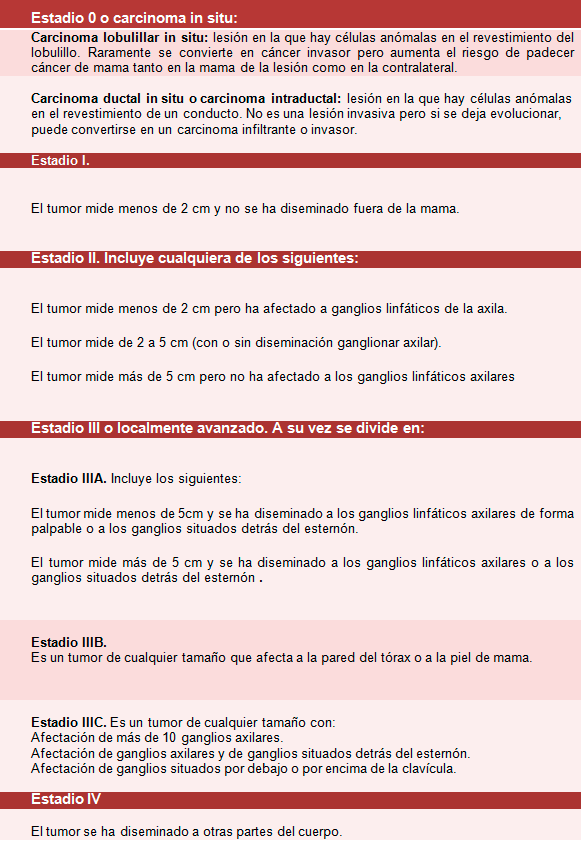

In [ ]:
# Asignar estadio basado en el área media
def asignar_estadio(area):
    if area < 200:
        return 'Estadio I'
    elif area < 800:
        return 'Estadio II'
    else:
        return 'Estadio III'

# Crear nueva columna en el DataFrame original
df['Estadio'] = df['area_mean'].apply(asignar_estadio)

# Ver distribución de pacientes por estadio
print(df['Estadio'].value_counts())


Estadio
Estadio II     427
Estadio III    138
Estadio I        4
Name: count, dtype: int64


- La gran mayoría de los pacientes son Estadio II.

- Hay una proporción significativa de Estadio III (tumores grandes).

- Estadio I es muy minoritario (lo cual tiene sentido clínico).



## 7.2 Visualización de la Distribución de Pacientes por Estadio

Para observar gráficamente cómo se distribuyen los pacientes en cada estadio, se realiza un countplot utilizando `seaborn`.

<ipython-input-84-e84b87a648a6>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




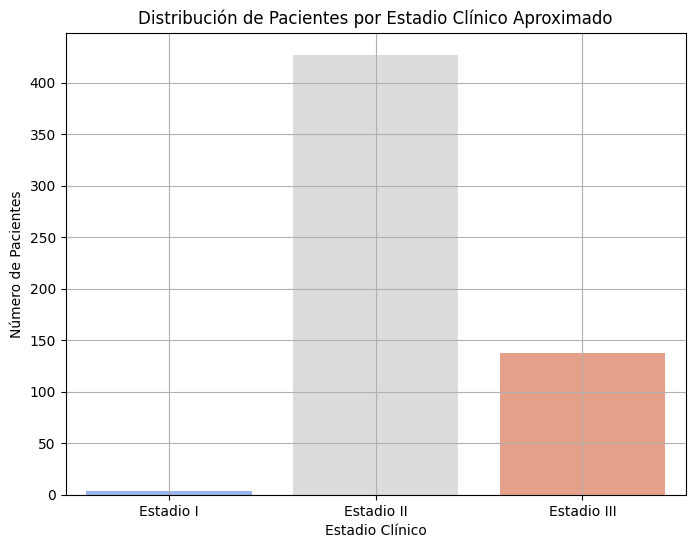

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de barras de la distribución de estadios
plt.figure(figsize=(8,6))
sns.countplot(x='Estadio', data=df, order=['Estadio I', 'Estadio II', 'Estadio III'], palette='coolwarm')
plt.title('Distribución de Pacientes por Estadio Clínico Aproximado')
plt.xlabel('Estadio Clínico')
plt.ylabel('Número de Pacientes')
plt.grid(True)
plt.show()


- Estadio II es el grupo mayoritario.

- Estadio III sigue en cantidad significativa.

- Estadio I es raro en este conjunto de pacientes.

Esto es coherente con la epidemiología de cáncer de mama.

## 7.3 Relación entre Estadio Clínico Aproximado y Diagnosis

Se analiza la relación entre el estadio clínico aproximado y el diagnóstico real (`diagnosis`: 0 = benigno, 1 = maligno), generando una tabla cruzada y una gráfica de barras apiladas.

In [ ]:
# Tabla cruzada de Estadio vs Diagnosis
tabla_estadio_diagnosis = pd.crosstab(df['Estadio'], df['diagnosis'])
print(tabla_estadio_diagnosis)


diagnosis      0    1
Estadio              
Estadio I      4    0
Estadio II   348   79
Estadio III    5  133


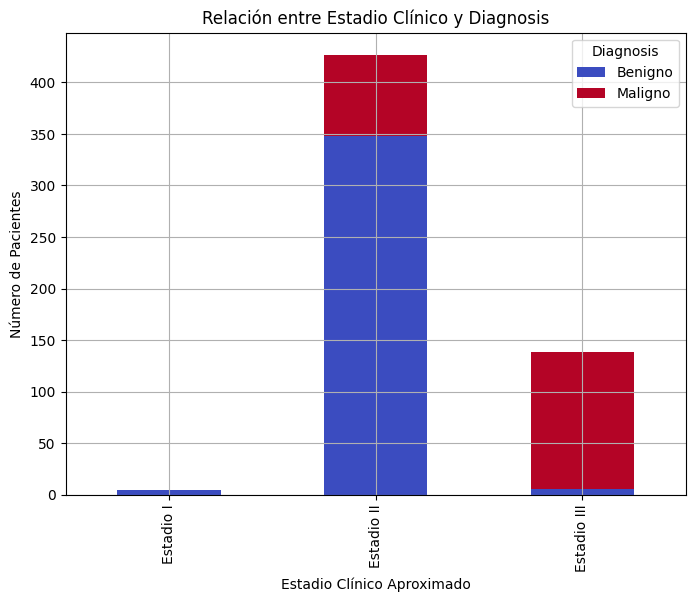

In [ ]:
# Gráfico de barras apiladas para Estadio vs Diagnosis
tabla_estadio_diagnosis.plot(kind='bar', stacked=True, figsize=(8,6), colormap='coolwarm')
plt.title('Relación entre Estadio Clínico y Diagnosis')
plt.xlabel('Estadio Clínico Aproximado')
plt.ylabel('Número de Pacientes')
plt.legend(title='Diagnosis', labels=['Benigno', 'Maligno'])
plt.grid(True)
plt.show()


- Estadio I: Todos los tumores son benignos.

- Estadio II: Predominan tumores benignos, pero ya aparece un porcentaje de malignos (~18%).

- Estadio III: Predominan claramente los tumores malignos (133 malignos frente a 5 benignos).

El aumento del tamaño tumoral está asociado con un aumento en la malignidad, lo cual concuerda con la teoría clínica.

## 7.4 Relación entre Clusters KMeans y Estadio Clínico

Se explora si los clusters formados por KMeans reflejan diferencias en los estadios clínicos.

Estadio         Estadio I  Estadio II  Estadio III
Cluster_KMeans                                    
0                       1         199           67
1                       0         117           42


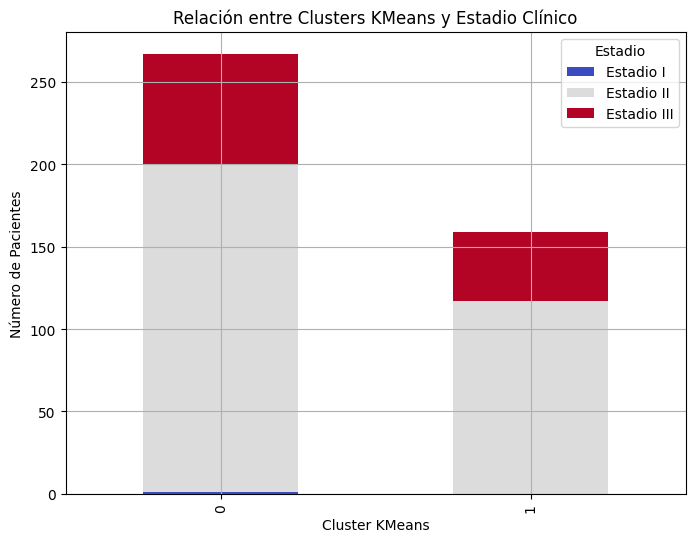

In [ ]:
# Tabla cruzada de Cluster KMeans vs Estadio
tabla_kmeans_estadio = pd.crosstab(pca_df['Cluster_KMeans'], df['Estadio'])
print(tabla_kmeans_estadio)

# Visualización
tabla_kmeans_estadio.plot(kind='bar', stacked=True, figsize=(8,6), colormap='coolwarm')
plt.title('Relación entre Clusters KMeans y Estadio Clínico')
plt.xlabel('Cluster KMeans')
plt.ylabel('Número de Pacientes')
plt.grid(True)
plt.show()


- Cluster 0 agrupa una mezcla, pero más de Estadio II y III.

- Cluster 1 también tiene principalmente Estadio II.

Hay una cierta diferenciación basada en el tamaño, aunque no es absoluta.

## 7.5 Relación entre Clusters DBSCAN y Estadio Clínico

Ahora se analiza si los clusters detectados por DBSCAN también muestran relación con el estadio clínico.

Estadio         Estadio I  Estadio II  Estadio III
Cluster_DBSCAN                                    
-1                      0          41           19
 0                      1         275           90


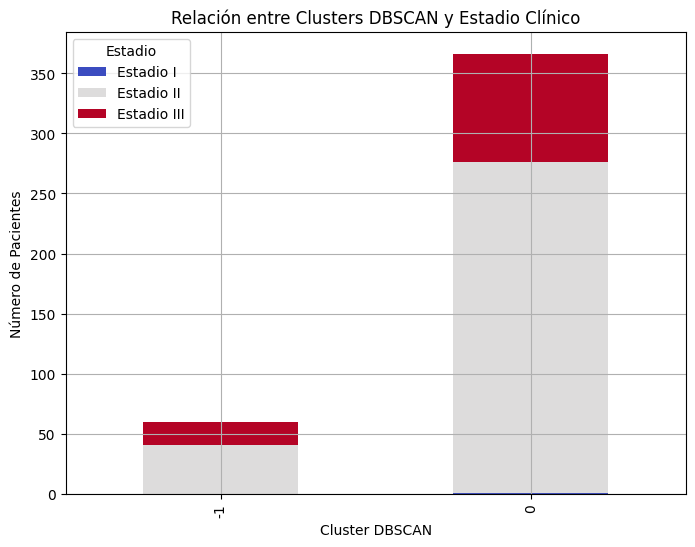

In [ ]:
# Tabla cruzada de Cluster DBSCAN vs Estadio
tabla_dbscan_estadio = pd.crosstab(pca_df['Cluster_DBSCAN'], df['Estadio'])
print(tabla_dbscan_estadio)

# Visualización
tabla_dbscan_estadio.plot(kind='bar', stacked=True, figsize=(8,6), colormap='coolwarm')
plt.title('Relación entre Clusters DBSCAN y Estadio Clínico')
plt.xlabel('Cluster DBSCAN')
plt.ylabel('Número de Pacientes')
plt.grid(True)
plt.show()


- Cluster 0 contiene principalmente Estadio II y III.

- Los pacientes detectados como ruido (-1) incluyen más tumores grandes (Estadio III).

DBSCAN identifica como "atípicos" o "lejanos" algunos tumores grandes, lo que tiene sentido clínico.

Vamos a calcularlo:

- En Cluster 0:

  - Total = 1 + 275 + 90 = 366 pacientes.

  - Estadio III = 90 pacientes.

  - Proporción Estadio III = 90/366 ≈ 24.6%

- En Ruido (-1):

  - Total = 0 + 41 + 19 = 60 pacientes.

  - Estadio III = 19 pacientes.

  - Proporción Estadio III = 19/60 ≈ 31.7%

Hay más tumores grandes en número absoluto en Cluster 0. (90 > 19)

Pero en porcentaje, dentro del ruido hay más tumores grandes (31.7%) que en el cluster principal (24.6%).

## 7.6 Relación entre Clusters Jerárquico (Ward) y Estadio Clínico

Finalmente, se analiza cómo se distribuyen los estadios en los clusters formados por el método jerárquico de Ward.

In [ ]:
from scipy.cluster.hierarchy import linkage, fcluster

# Clustering jerárquico con Ward
linked_ward = linkage(X_cluster_hierarchical, method='ward')

# Cortar para 2 clusters
clusters_ward = fcluster(linked_ward, t=2, criterion='maxclust')

# Añadir clusters a DataFrame si no lo tienes
pca_df['Cluster_Ward'] = clusters_ward


Estadio       Estadio I  Estadio II  Estadio III
Cluster_Ward                                    
1                     0          35           19
2                     1         281           90


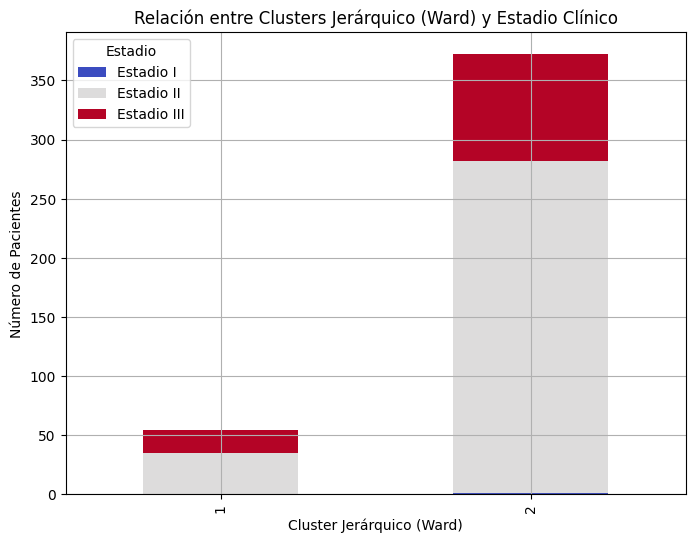

In [ ]:
# Tabla cruzada de Cluster Ward vs Estadio
tabla_ward_estadio = pd.crosstab(pca_df['Cluster_Ward'], df['Estadio'])
print(tabla_ward_estadio)

# Visualización
tabla_ward_estadio.plot(kind='bar', stacked=True, figsize=(8,6), colormap='coolwarm')
plt.title('Relación entre Clusters Jerárquico (Ward) y Estadio Clínico')
plt.xlabel('Cluster Jerárquico (Ward)')
plt.ylabel('Número de Pacientes')
plt.grid(True)
plt.show()


- Cluster 2 contiene la mayoría de los pacientes, especialmente en Estadio II.

- Cluster 1 tiene una mayor proporción relativa de Estadio III.

El clustering jerárquico también refleja parcialmente la separación de pacientes según la agresividad (tamaño tumoral).

- En Cluster 1:

  - Total = 0 + 35 + 19 = 54 pacientes.

  - Estadio III = 19 pacientes.
  - Proporción Estadio III = 19/54 ≈ 35.2%

- En Cluster 2:

  - Total = 1 + 281 + 90 = 372 pacientes.

  - Estadio III = 90 pacientes.
  - Proporción Estadio III = 90/372 ≈ 24.2%

Hay más tumores grandes en número absoluto en Cluster 2.

Pero en porcentaje, en Cluster 1 hay más tumores grandes (35.2% frente a 24.2%).